<a href="https://colab.research.google.com/github/ursulacotrina/Project01/blob/main/data_analysisV2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 00 Github

In [32]:
#!pip install gitpython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.3 MB/s eta 0:00:00


In [33]:
#import git

# Clonar el repositorio
#git.Git().clone("https://github.com/ursulacotrina/Project01.git")

''

In [39]:
!wget https://raw.githubusercontent.com/ursulacotrina/Project01/main/data_analysisV2.ipynb

--2023-06-08 15:38:20--  https://raw.githubusercontent.com/ursulacotrina/Project01/main/data_analysisV2.ipynb
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1080840 (1.0M) [text/plain]
Saving to: ‘data_analysisV2.ipynb.1’

data_analysisV2.ipy 100%[===================>]   1.03M  --.-KB/s    in 0.06s   

2023-06-08 15:38:20 (16.3 MB/s) - ‘data_analysisV2.ipynb.1’ saved [1080840/1080840]



In [46]:
#import data_analysisV2.ipynb
# %run data_analysisV2.ipynb

# 01 instalar librerias

In [5]:
!pip install --upgrade -q pygsheets

In [6]:
!pip install Levenshtein


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
#import sys
#sys.executable

In [8]:
import warnings
import datetime
from datetime import datetime
import time
from datetime import date
import pandas as pd
import google.auth
from google.colab import auth
auth.authenticate_user()
import pygsheets
credentials, _ = google.auth.default()
gc = pygsheets.client.Client(credentials)

import numpy as np
import seaborn as sns
import Levenshtein  as lv
from itertools import combinations, permutations
import matplotlib.pyplot as plt

In [9]:
pd.set_option('display.max_columns', None)
warnings.filterwarnings("ignore")

# 02 funciones

In [10]:
def open_gsheets(link, sheet_index):
  sh1 = gc.open_by_url(link)
  wks = sh1[sheet_index]
  data_get = pd.DataFrame(wks.get_all_records()) #get values with out colnames (with colnames drop some columns)
  return data_get

In [11]:
def combinations_string(phrases):
  p = phrases.split()
  return [" ".join(a) for a in permutations(p, len(p))]

In [12]:
def match_phrases_target(list_1, list_2, nn):
  '''
  match_phrases_target

  Compare all word combinations of phrases versus a string target by Levenshtein algorithm, result is data frame with 
  list of phrases, list of NN firsts string target more likely to match list of phrases, combination winner and ratio of match
  calculated by Levenshtein 
  '''
  r  =pd.DataFrame(columns=['index', 'list_1_phrases', 'list_2_ccpp', 'combination', 'ratio'])
  nn = nn
  for i in list_1:
    #print('frase: ',i)
    k = []
    for l in list_2:
      w=[[],[]]
      for j in combinations_string(i):
        aa = lv.ratio(j, l)
        w[0].append(j)
        w[1].append(aa)
        #print('ccpp: '+l, 'combinación: '+j, aa)
      a_max = max(w[1])
      a_max_arg = w[0][w[1].index(max(w[1]))]
      k.append([i, l, a_max_arg,a_max])
    #print(k)
    dd = pd.DataFrame(k, columns=['list_1_phrases', 'list_2_ccpp', 'combination', 'ratio']).sort_values(
      by=['list_1_phrases','ratio'], ascending=False).reset_index()[0:nn]
    r = r.append(dd, ignore_index=True)
  return r

# 03 limpieza de datos

## 03 01 importar datos

In [13]:
link = 'https://docs.google.com/spreadsheets/d/1BAbFMVPSNuHdj5MaUZqLXgLYN8XA27ERrRbvovVrEHY/edit?usp=drive_web&ouid=117333138354521315740'

### 03 01_01 Importar hoja "datoscongreso"

In [14]:
sheet_index = 0
datoscongreso = open_gsheets(link, sheet_index)
datoscongreso.head(4)

,titulo,periodo,legisla,fechapresenta,proponente,sumilla,observaciones,autor,coautor,adherentes,grupoparla,comisiones,ultimoestado,estadoscrap,autorlink,fecha,enlace
0,PROYECTO DE LEY N° 00003/2021-CR,2021-2026,Primera Legislatura Ordinaria 2021,05/08/2021,Proponente\nCongreso,Sumilla\nPROPONE REFORMA CONSTITUCIONAL DEL AR...,LEY QUE DESARROLLA EL EJERCICIO DE LA CUESTIÓN...,"Luna Gálvez, José León","Coautores\nWong Pujada, Enrique\nAnderson Ramí...",Adherentes\n- -,Podemos Perú,Constitución y Reglamento,Publicada en el Diario Oficial El Peruano (Seg...,yes,https://www.congreso.gob.pe/congresistas2021/J...,02/05/2023 17:32:29,https://wb2server.congreso.gob.pe/spley-portal...
1,PROYECTO DE LEY N° 00004/2021-CR,2021-2026,Primera Legislatura Ordinaria 2021,10/08/2021,Proponente\nCongreso,Sumilla\nPROPONE DECLARAR DE NECESIDAD PÚBLICA...,LEY QUE DECLARA DE INTERÉS NACIONAL AL RECUPER...,"Córdova Lobatón, María Jessica","Coautores\nCueto Aservi, José Ernesto\nCiccia ...",Adherentes\n- -,Renovación Popular,"Producción, Micro y Pequeña Empresa y Cooperat...",Publicada en el Diario Oficial El Peruano (Seg...,yes,https://www.congreso.gob.pe/congresistas2021/M...,02/05/2023 17:32:32,https://wb2server.congreso.gob.pe/spley-portal...
2,PROYECTO DE LEY N° 00005/2021-CR,2021-2026,Primera Legislatura Ordinaria 2021,10/08/2021,Proponente\nCongreso,"Sumilla\nPROPONE MODIFICAR EL ARTÍCULO 8, NUME...","LEY QUE MODIFICA LA LEY 29158, LEY ORGÁNICA DE...","Bazán Calderón, Diego Alonso Fernando","Coautores\nCueto Aservi, José Ernesto\nYarrow ...",Adherentes\n- -,Renovación Popular,"Descentralización, Regionalización, Gobiernos ...",Publicada en el Diario Oficial El Peruano (Seg...,yes,https://www.congreso.gob.pe/congresistas2021/D...,02/05/2023 17:32:35,https://wb2server.congreso.gob.pe/spley-portal...
3,PROYECTO DE LEY N° 00006/2021-CR,2021-2026,Primera Legislatura Ordinaria 2021,10/08/2021,Proponente\nCongreso,Sumilla\nPROPONE INTERPRETAR EL USO DE LA CUES...,LEY QUE DESARROLLA EL EJERCICIO DE LA CUESTIÓN...,"Aragón Carreño, Luis Ángel","Coautores\nSoto Palacios, Wilson\nDoroteo Carb...",Adherentes\n- -,Acción Popular,Constitución y Reglamento,Publicada en el Diario Oficial El Peruano (Seg...,yes,https://www.congreso.gob.pe/congresistas2021/L...,02/05/2023 17:32:38,https://wb2server.congreso.gob.pe/spley-portal...


### 03 01_02 Importar hoja "datoscongresoseguimiento"

In [15]:
sheet_index = 1
datoscongresoseguimiento = open_gsheets(link, sheet_index)
datoscongresoseguimiento.head(4)

,FECHA,ESTADO PROCESAL,COMISIÓN,DETALLE,ADJUNTOS,enlace
0,Fecha28/12/2022,EstadoDictamen,ComisiónJusticia y Derechos Humanos,DetallePOR UNANIMIDAD - NO APROBACIÓN Y SU ENV...,AdjuntosAdjuntos,https://wb2server.congreso.gob.pe/spley-portal...
1,Fecha20/08/2021,EstadoEN COMISIÓN,ComisiónJusticia y Derechos Humanos,NaN,AdjuntosAdjuntos,https://wb2server.congreso.gob.pe/spley-portal...
2,Fecha03/08/2021,EstadoPRESENTADO,NaN,DetalleLEY QUE MODIFICA EL ARTÍCULO 108-C DEL ...,AdjuntosAdjuntos,https://wb2server.congreso.gob.pe/spley-portal...
3,Fecha28/12/2022,EstadoDictamen,ComisiónJusticia y Derechos Humanos,DetallePOR UNANIMIDAD - NO APROBACIÓN Y SU ENV...,AdjuntosAdjuntos,https://wb2server.congreso.gob.pe/spley-portal...


### 03 01_03 Importar hoja "datoscongresistas"

In [16]:
sheet_index = 2
datoscongresistas = open_gsheets(link, sheet_index)
datoscongresistas.head(4)

,nombre,votacion,inicio,fin,grupopartido,bancada,representa,condicion,estadoscrap,fecha,enlace
0,,109702,27-jul-2011,26-jul-2016,Gana Perú,ACCIÓN POPULAR - FRENTE AMPLIO,LIMA,Fallecido,yes,02/05/2023 3:01:13,1
1,WALTER ACHA ROMANÍ,15087,27-jul-2011,26-jul-2016,Gana Perú,NO AGRUPADOS,Ayacucho,en Ejercicio,yes,02/05/2023 3:01:18,2
2,RICHARD FRANK ACUÑA NÚÑEZ,74789,27-jul-2011,26-jul-2016,Alianza por el Gran Cambio,PPC - APP,La libertad,en Ejercicio,yes,02/05/2023 3:01:21,3
3,VIRGILIO ACUÑA PERALTA,26058,27-jul-2011,26-jul-2016,Alianza Solidaridad Nacional,SOLIDARIDAD NACIONAL,Lambayeque,en Ejercicio,yes,02/05/2023 3:01:24,4


### 03 01_04 Importar Matriz seguimiento coordinación parlamentaria

In [17]:
mat = 'https://docs.google.com/spreadsheets/d/1X8-qlFkkR6CIKbx3_V7m-Ela0cfsjUuTUjfAwgoXxto/edit#gid=2082768581' 
#copia generada en google sheet, se corrigieron NUMERO 1221/21 y 503/20211

In [18]:
sheet_index = 0
matrix = open_gsheets(mat, sheet_index)
matrix.head(4)

,FECHA,NUMERO,PROYECTO / DESCRIPCIÓN,PROPONENTE,BANCADA,ALERTA,COMISIÓN,ESTADO,COMENTARIOS,BANCADAS A FAVOR,BANCADAS EN CONTRA,BANCADAS EN ABSTENCIÓN,IMPACTO,JUSTIFICACIÓN DEL IMPACTO,AMBIENTE FAVORABLE,GRADO POPULISTA,PROBABILIDAD,OPINION GREMIAL
0,11/5/2023,4975/2023,Ley que habilita a las billeteras digitales pa...,Silvia Monteza Facho,Acción Popular,,,,,,,,,,,,,
1,10/5/2023,4939/2023,Ley que modifica código de consumidor e incorp...,Norma Yarrow,Avanza País,,,,,,,,,,,,,
2,11/4/2023,4704/2023,Reprogramación de deudas de personas naturales...,Vivian Olivos Martinez,Fuerza Popular,rojo,,,,,,,,,,,,
3,10/4/2023,4682/2023,Ley que dispone la incorporación de la educaci...,Flavio Cruz Mamani,Peru Libre,verde,,,,,,,Riesgo no material (1),,,3,,


In [19]:
matrix['key_proy'] = [x.zfill(10) for x in matrix['NUMERO']]
matrix[['key_proy', 'NUMERO']]

,key_proy,NUMERO
0,04975/2023,4975/2023
1,04939/2023,4939/2023
2,04704/2023,4704/2023
3,04682/2023,4682/2023
4,04525/2022,4525/2022
...,...,...
65,00503/2021,503/2021
66,00457/2021,457/2021
67,415/2021\n\n398/2021\n,415/2021\n\n398/2021\n
68,00158/2021,158/2021


In [20]:
matrix_pf = matrix.add_prefix('matrix ')

In [21]:
matrix_pf.columns

Index(['matrix FECHA', 'matrix NUMERO', 'matrix PROYECTO / DESCRIPCIÓN',
       'matrix PROPONENTE', 'matrix BANCADA', 'matrix ALERTA',
       'matrix COMISIÓN', 'matrix ESTADO', 'matrix COMENTARIOS',
       'matrix BANCADAS A FAVOR ', 'matrix BANCADAS EN CONTRA ',
       'matrix BANCADAS EN ABSTENCIÓN', 'matrix IMPACTO',
       'matrix JUSTIFICACIÓN DEL IMPACTO', 'matrix AMBIENTE FAVORABLE',
       'matrix GRADO  POPULISTA', 'matrix PROBABILIDAD',
       'matrix OPINION GREMIAL', 'matrix key_proy'],
      dtype='object')

## 03 02 Limpieza

### 03 02_01 Limpieza "datoscongreso"

In [22]:
datoscongreso.columns

Index(['titulo', 'periodo', 'legisla', 'fechapresenta', 'proponente',
       'sumilla', 'observaciones', 'autor', 'coautor', 'adherentes',
       'grupoparla', 'comisiones', 'ultimoestado', 'estadoscrap', 'autorlink',
       'fecha', 'enlace'],
      dtype='object')

In [31]:
has_line_break = datoscongreso['comisiones'].str.contains('\n')
datoscongreso[has_line_break]

,titulo,periodo,legisla,fechapresenta,proponente,sumilla,observaciones,autor,coautor,adherentes,grupoparla,comisiones,ultimoestado,estadoscrap,autorlink,fecha,enlace


In [25]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
datoscongreso.head()

,titulo,periodo,legisla,fechapresenta,proponente,sumilla,observaciones,autor,coautor,adherentes,grupoparla,comisiones,ultimoestado,estadoscrap,autorlink,fecha,enlace
0,PROYECTO DE LEY N° 00003/2021-CR,2021-2026,Primera Legislatura Ordinaria 2021,05/08/2021,Proponente\nCongreso,Sumilla\nPROPONE REFORMA CONSTITUCIONAL DEL ARTÍCULO 133 SOBRE LA CUESTIÓN DE CONFIANZA,LEY QUE DESARROLLA EL EJERCICIO DE LA CUESTIÓN DE CONFIANZA REGULADA EN EL ÚLTIMO PÁRRAFO DEL ARTÍCULO 132 Y EN EL ARTÍCULO 133 DE LA CONSTITUCIÓN POLÍTICA DEL PERÚ,"Luna Gálvez, José León","Coautores\nWong Pujada, Enrique\nAnderson Ramírez, Carlos Antonio\nElías Ávalos, José Luis",Adherentes\n- -,Podemos Perú,Constitución y Reglamento,Publicada en el Diario Oficial El Peruano (Seguimientos),yes,https://www.congreso.gob.pe/congresistas2021/JoseLuna/,02/05/2023 17:32:29,https://wb2server.congreso.gob.pe/spley-portal/#/expediente/2021/3
1,PROYECTO DE LEY N° 00004/2021-CR,2021-2026,Primera Legislatura Ordinaria 2021,10/08/2021,Proponente\nCongreso,"Sumilla\nPROPONE DECLARAR DE NECESIDAD PÚBLICA E INTERÉS NACIONAL LA RECUPERACIÓN, CONSERVACIÓN Y PROTECCIÓN DE LA PESCA ANCESTRAL EN CABALLITO DE TOTORA Y LA CREACIÓN DE LOS BALSARES EN EL DISTRITO DE PIMENTEL, PROVINCIA DE CHICLAYO, DEPARTAMENTO DE LAMBAYEQUE.","LEY QUE DECLARA DE INTERÉS NACIONAL AL RECUPERACIÓN, CONSERVACIÓN Y PROTECCIÓN DE LA PESCA ANCESTRAL EN CABALLITO DE TOTORA Y LA CREACIÓN DE BALSARES PARA EL CULTIVO DE TOTORA, EN EL DISTRITO DE PIMENTEL, PROVINCIA DE CHICLAYO, DEPARTAMENTO DE LAMBAYEQUE","Córdova Lobatón, María Jessica","Coautores\nCueto Aservi, José Ernesto\nCiccia Vásquez, Miguel Ángel\nYarrow Lumbreras, Norma Martina\nBazán Calderón, Diego Alonso Fernando\nMontoya Manrique, Jorge Carlos",Adherentes\n- -,Renovación Popular,"Producción, Micro y Pequeña Empresa y Cooperativas",Publicada en el Diario Oficial El Peruano (Seguimientos),yes,https://www.congreso.gob.pe/congresistas2021/MariaCordova/,02/05/2023 17:32:32,https://wb2server.congreso.gob.pe/spley-portal/#/expediente/2021/4
2,PROYECTO DE LEY N° 00005/2021-CR,2021-2026,Primera Legislatura Ordinaria 2021,10/08/2021,Proponente\nCongreso,"Sumilla\nPROPONE MODIFICAR EL ARTÍCULO 8, NUMERAL 2) LITERAL I) DE LA LEY 29158 LEY ORGÁNICA DEL PODER EJECUTIVO.","LEY QUE MODIFICA LA LEY 29158, LEY ORGÁNICA DEL PODER EJECUTIVO, CON LA FINALIDAD DE ESTABLECER PROCEDIMIENTOS PARA EL NOMBRAMIENTO DE MINISTROS Y VICEMINISTROS, Y ATRIBUCIONES DEL CONSEJO DE MINISTROS","Bazán Calderón, Diego Alonso Fernando","Coautores\nCueto Aservi, José Ernesto\nYarrow Lumbreras, Norma Martina\nCiccia Vásquez, Miguel Ángel\nCórdova Lobatón, María Jessica\nMontoya Manrique, Jorge Carlos",Adherentes\n- -,Renovación Popular,"Descentralización, Regionalización, Gobiernos Locales y Modernización de la Gestión del Estado",Publicada en el Diario Oficial El Peruano (Seguimientos),yes,https://www.congreso.gob.pe/congresistas2021/DiegoBazan/,02/05/2023 17:32:35,https://wb2server.congreso.gob.pe/spley-portal/#/expediente/2021/5
3,PROYECTO DE LEY N° 00006/2021-CR,2021-2026,Primera Legislatura Ordinaria 2021,10/08/2021,Proponente\nCongreso,Sumilla\nPROPONE INTERPRETAR EL USO DE LA CUESTIÓN DE CONFIANZA REGULADA EN LOS ARTÍCULOS 132 Y 133 DE LA CONSTITUCIÓN POLÍTICA DEL PERÚ.,LEY QUE DESARROLLA EL EJERCICIO DE LA CUESTIÓN DE CONFIANZA REGULADA EN EL ÚLTIMO PÁRRAFO DEL ARTÍCULO 132 Y EN EL ARTÍCULO 133 DE LA CONSTITUCIÓN POLÍTICA DEL PERÚ,"Aragón Carreño, Luis Ángel","Coautores\nSoto Palacios, Wilson\nDoroteo Carbajo, Raúl Felipe\nParedes Fonseca, Karol Ivett\nVergara Mendoza, Elvis Hernán\nMonteza Facho, Silvia María\nMori Celis, Juan Carlos\nLópez Ureña, Ilich Fredy",Adherentes\n- -,Acción Popular,Constitución y Reglamento,Publicada en el Diario Oficial El Peruano (Seguimientos),yes,https://www.congreso.gob.pe/congresistas2021/LuisAragon/,02/05/2023 17:32:38,https://wb2server.congreso.gob.pe/spley-portal/#/expediente/2021/6
4,PROYECTO DE LEY N° 00007/2021-CR,2021-2026,Primera Legislatura Ordi

In [23]:
datoscongreso.head()

,titulo,periodo,legisla,fechapresenta,proponente,sumilla,observaciones,autor,coautor,adherentes,grupoparla,comisiones,ultimoestado,estadoscrap,autorlink,fecha,enlace
0,PROYECTO DE LEY N° 00003/2021-CR,2021-2026,Primera Legislatura Ordinaria 2021,05/08/2021,Proponente\nCongreso,Sumilla\nPROPONE REFORMA CONSTITUCIONAL DEL AR...,LEY QUE DESARROLLA EL EJERCICIO DE LA CUESTIÓN...,"Luna Gálvez, José León","Coautores\nWong Pujada, Enrique\nAnderson Ramí...",Adherentes\n- -,Podemos Perú,Constitución y Reglamento,Publicada en el Diario Oficial El Peruano (Seg...,yes,https://www.congreso.gob.pe/congresistas2021/J...,02/05/2023 17:32:29,https://wb2server.congreso.gob.pe/spley-portal...
1,PROYECTO DE LEY N° 00004/2021-CR,2021-2026,Primera Legislatura Ordinaria 2021,10/08/2021,Proponente\nCongreso,Sumilla\nPROPONE DECLARAR DE NECESIDAD PÚBLICA...,LEY QUE DECLARA DE INTERÉS NACIONAL AL RECUPER...,"Córdova Lobatón, María Jessica","Coautores\nCueto Aservi, José Ernesto\nCiccia ...",Adherentes\n- -,Renovación Popular,"Producción, Micro y Pequeña Empresa y Cooperat...",Publicada en el Diario Oficial El Peruano (Seg...,yes,https://www.congreso.gob.pe/congresistas2021/M...,02/05/2023 17:32:32,https://wb2server.congreso.gob.pe/spley-portal...
2,PROYECTO DE LEY N° 00005/2021-CR,2021-2026,Primera Legislatura Ordinaria 2021,10/08/2021,Proponente\nCongreso,"Sumilla\nPROPONE MODIFICAR EL ARTÍCULO 8, NUME...","LEY QUE MODIFICA LA LEY 29158, LEY ORGÁNICA DE...","Bazán Calderón, Diego Alonso Fernando","Coautores\nCueto Aservi, José Ernesto\nYarrow ...",Adherentes\n- -,Renovación Popular,"Descentralización, Regionalización, Gobiernos ...",Publicada en el Diario Oficial El Peruano (Seg...,yes,https://www.congreso.gob.pe/congresistas2021/D...,02/05/2023 17:32:35,https://wb2server.congreso.gob.pe/spley-portal...
3,PROYECTO DE LEY N° 00006/2021-CR,2021-2026,Primera Legislatura Ordinaria 2021,10/08/2021,Proponente\nCongreso,Sumilla\nPROPONE INTERPRETAR EL USO DE LA CUES...,LEY QUE DESARROLLA EL EJERCICIO DE LA CUESTIÓN...,"Aragón Carreño, Luis Ángel","Coautores\nSoto Palacios, Wilson\nDoroteo Carb...",Adherentes\n- -,Acción Popular,Constitución y Reglamento,Publicada en el Diario Oficial El Peruano (Seg...,yes,https://www.congreso.gob.pe/congresistas2021/L...,02/05/2023 17:32:38,https://wb2server.congreso.gob.pe/spley-portal...
4,PROYECTO DE LEY N° 00007/2021-CR,2021-2026,Primera Legislatura Ordinaria 2021,10/08/2021,Proponente\nCongreso,Sumilla\nPROPONE MODIFICAR LOS ARTÍCULOS 9° Y ...,- -,"Muñante Barrios, Alejandro","Coautores\nCueto Aservi, José Ernesto\nMontoya...",Adherentes\n- -,Renovación Popular,Constitución y Reglamento,Dictamen (Seguimientos),yes,https://www.congreso.gob.pe/congresistas2021/A...,02/05/2023 17:32:40,https://wb2server.congreso.gob.pe/spley-portal...


In [ ]:
datoscongreso['proponente'] = datoscongreso['proponente'].str.split('\n', expand=True)[1]
datoscongreso['coautor'] = datoscongreso['coautor'].str.split('\n', expand=True)[1]
datoscongreso['sumilla'] = datoscongreso['sumilla'].str.split('\n', expand=True)[1]
datoscongreso['adherentes'] = datoscongreso['adherentes'].str.split('\n', expand=True)[1]
datoscongreso.head(4)

,titulo,periodo,legisla,fechapresenta,proponente,sumilla,observaciones,autor,coautor,adherentes,grupoparla,comisiones,ultimoestado,estadoscrap,autorlink,fecha,enlace
0,PROYECTO DE LEY N° 00003/2021-CR,2021-2026,Primera Legislatura Ordinaria 2021,05/08/2021,Congreso,PROPONE REFORMA CONSTITUCIONAL DEL ARTÍCULO 133 SOBRE LA CUESTIÓN DE CONFIANZA,LEY QUE DESARROLLA EL EJERCICIO DE LA CUESTIÓN DE CONFIANZA REGULADA EN EL ÚLTIMO PÁRRAFO DEL ARTÍCULO 132 Y EN EL ARTÍCULO 133 DE LA CONSTITUCIÓN POLÍTICA DEL PERÚ,"Luna Gálvez, José León","Wong Pujada, Enrique",- -,Podemos Perú,Constitución y Reglamento,Publicada en el Diario Oficial El Peruano (Seguimientos),yes,https://www.congreso.gob.pe/congresistas2021/JoseLuna/,02/05/2023 17:32:29,https://wb2server.congreso.gob.pe/spley-portal/#/expediente/2021/3
1,PROYECTO DE LEY N° 00004/2021-CR,2021-2026,Primera Legislatura Ordinaria 2021,10/08/2021,Congreso,"PROPONE DECLARAR DE NECESIDAD PÚBLICA E INTERÉS NACIONAL LA RECUPERACIÓN, CONSERVACIÓN Y PROTECCIÓN DE LA PESCA ANCESTRAL EN CABALLITO DE TOTORA Y LA CREACIÓN DE LOS BALSARES EN EL DISTRITO DE PIMENTEL, PROVINCIA DE CHICLAYO, DEPARTAMENTO DE LAMBAYEQUE.","LEY QUE DECLARA DE INTERÉS NACIONAL AL RECUPERACIÓN, CONSERVACIÓN Y PROTECCIÓN DE LA PESCA ANCESTRAL EN CABALLITO DE TOTORA Y LA CREACIÓN DE BALSARES PARA EL CULTIVO DE TOTORA, EN EL DISTRITO DE PIMENTEL, PROVINCIA DE CHICLAYO, DEPARTAMENTO DE LAMBAYEQUE","Córdova Lobatón, María Jessica","Cueto Aservi, José Ernesto",- -,Renovación Popular,"Producción, Micro y Pequeña Empresa y Cooperativas",Publicada en el Diario Oficial El Peruano (Seguimientos),yes,https://www.congreso.gob.pe/congresistas2021/MariaCordova/,02/05/2023 17:32:32,https://wb2server.congreso.gob.pe/spley-portal/#/expediente/2021/4
2,PROYECTO DE LEY N° 00005/2021-CR,2021-2026,Primera Legislatura Ordinaria 2021,10/08/2021,Congreso,"PROPONE MODIFICAR EL ARTÍCULO 8, NUMERAL 2) LITERAL I) DE LA LEY 29158 LEY ORGÁNICA DEL PODER EJECUTIVO.","LEY QUE MODIFICA LA LEY 29158, LEY ORGÁNICA DEL PODER EJECUTIVO, CON LA FINALIDAD DE ESTABLECER PROCEDIMIENTOS PARA EL NOMBRAMIENTO DE MINISTROS Y VICEMINISTROS, Y ATRIBUCIONES DEL CONSEJO DE MINISTROS","Bazán Calderón, Diego Alonso Fernando","Cueto Aservi, José Ernesto",- -,Renovación Popular,"Descentralización, Regionalización, Gobiernos Locales y Modernización de la Gestión del Estado",Publicada en el Diario Oficial El Peruano (Seguimientos),yes,https://www.congreso.gob.pe/congresistas2021/DiegoBazan/,02/05/2023 17:32:35,https://wb2server.congreso.gob.pe/spley-portal/#/expediente/2021/5
3,PROYECTO DE LEY N° 00006/2021-CR,2021-2026,Primera Legislatura Ordinaria 2021,10/08/2021,Congreso,PROPONE INTERPRETAR EL USO DE LA CUESTIÓN DE CONFIANZA REGULADA EN LOS ARTÍCULOS 132 Y 133 DE LA CONSTITUCIÓN POLÍTICA DEL PERÚ.,LEY QUE DESARROLLA EL EJERCICIO DE LA CUESTIÓN DE CONFIANZA REGULADA EN EL ÚLTIMO PÁRRAFO DEL ARTÍCULO 132 Y EN EL ARTÍCULO 133 DE LA CONSTITUCIÓN POLÍTICA DEL PERÚ,"Aragón Carreño, Luis Ángel","Soto Palacios, Wilson",- -,Acción Popular,Constitución y Reglamento,Publicada en el Diario Oficial El Peruano (Seguimientos),yes,https://www.congreso.gob.pe/congresistas2021/LuisAragon/,02/05/2023 17:32:38,https://wb2server.congreso.gob.pe/spley-portal/#/expediente/2021/6


In [ ]:
datoscongreso['autor'] = datoscongreso['autor'].str.upper()
datoscongreso['autor'] = datoscongreso['autor'].str.replace(',','')

datoscongreso['autor']

0                      LUNA GÁLVEZ JOSÉ LEÓN
1              CÓRDOVA LOBATÓN MARÍA JESSICA
2       BAZÁN CALDERÓN DIEGO ALONSO FERNANDO
3                  ARAGÓN CARREÑO LUIS ÁNGEL
4                  MUÑANTE BARRIOS ALEJANDRO
                        ...                 
4262          CASTILLO RIVAS EDUARDO ENRIQUE
4263          CASTILLO RIVAS EDUARDO ENRIQUE
4264          CASTILLO RIVAS EDUARDO ENRIQUE
4265          CASTILLO RIVAS EDUARDO ENRIQUE
4266          CASTILLO RIVAS EDUARDO ENRIQUE
Name: autor, Length: 4267, dtype: object

In [ ]:
datoscongreso[datoscongreso.duplicated(['titulo'])]

,titulo,periodo,legisla,fechapresenta,proponente,sumilla,observaciones,autor,coautor,adherentes,grupoparla,comisiones,ultimoestado,estadoscrap,autorlink,fecha,enlace
3373,PROYECTO DE LEY N° 03923/2022-CR,2021-2026,Primera Legislatura Ordinaria 2022,06/01/2023,Congreso,"PROPONE DECLARAR CADA 16 DE DICIEMBRE COMO DÍA DE LA SUBLEVACIÓN DE LA NACIÓN AIMARA DE HUANCHO LIMA, CIUDAD DE LAS NIEVES",- -,CRUZ MAMANI FLAVIO,"Gonza Castillo, Américo",- -,Perú Libre,Cultura y Patrimonio Cultural,EN COMISIÓN (Seguimientos),yes,https://www.congreso.gob.pe/congresistas2021/FlavioCruz/,02/05/2023 20:16:29,https://wb2server.congreso.gob.pe/spley-portal/#/expediente/2021/3924
3975,PROYECTO DE LEY N° 04548/2022-CR,2021-2026,Segunda Legislatura Ordinaria 2022,23/03/2023,Congreso,PROPONE PROMUEVER MEDIDAS PARA GARANTIZAR EL DERECHO A LA EDUCACIÓN DE ESTUDIANTES CON NECESIDADES EDUCATIVAS ESPECIALES.,- -,CASTILLO RIVAS EDUARDO ENRIQUE,"Ventura Ángel, Héctor José",- -,Fuerza Popular,"Educación, Juventud y Deporte",EN COMISIÓN (Seguimientos),yes,https://www.congreso.gob.pe/congresistas2021/EduardoCastillo/,02/05/2023 20:43:12,https://wb2server.congreso.gob.pe/spley-portal/#/expediente/2021/4549
3976,PROYECTO DE LEY N° 04548/2022-CR,2021-2026,Segunda Legislatura Ordinaria 2022,23/03/2023,Congreso,PROPONE PROMUEVER MEDIDAS PARA GARANTIZAR EL DERECHO A LA EDUCACIÓN DE ESTUDIANTES CON NECESIDADES EDUCATIVAS ESPECIALES.,- -,CASTILLO RIVAS EDUARDO ENRIQUE,"Ventura Ángel, Héctor José",- -,Fuerza Popular,"Educación, Juventud y Deporte",EN COMISIÓN (Seguimientos),yes,https://www.congreso.gob.pe/congresistas2021/EduardoCastillo/,02/05/2023 20:43:14,https://wb2server.congreso.gob.pe/spley-portal/#/expediente/2021/4550
3977,PROYECTO DE LEY N° 04548/2022-CR,2021-2026,Segunda Legislatura Ordinaria 2022,23/03/2023,Congreso,PROPONE PROMUEVER MEDIDAS PARA GARANTIZAR EL DERECHO A LA EDUCACIÓN DE ESTUDIANTES CON NECESIDADES EDUCATIVAS ESPECIALES.,- -,CASTILLO RIVAS EDUARDO ENRIQUE,"Ventura Ángel, Héctor José",- -,Fuerza Popular,"Educación, Juventud y Deporte",EN COMISIÓN (Seguimientos),yes,https://www.congreso.gob.pe/congresistas2021/EduardoCastillo/,02/05/2023 20:43:17,https://wb2server.congreso.gob.pe/spley-portal/#/expediente/2021/4551
3978,PROYECTO DE LEY N° 04548/2022-CR,2021-2026,Segunda Legislatura Ordinaria 2022,23/03/2023,Congreso,PROPONE PROMUEVER MEDIDAS PARA GARANTIZAR EL DERECHO A LA EDUCACIÓN DE ESTUDIANTES CON NECESIDADES EDUCATIVAS ESPECIALES.,- -,CASTILLO RIVAS EDUARDO ENRIQUE,"Ventura Ángel, Héctor José",- -,Fuerza Popular,"Educación, Juventud y Deporte",EN COMISIÓN (Seguimientos),yes,https://www.congreso.gob.pe/congresistas2021/EduardoCastillo/,02/05/2023 20:43:19,https://wb2server.congreso.gob.pe/spley-portal/#/expediente/2021/4552
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4262,PROYECTO DE LEY N° 04548/2022-CR,2021-2026,Segunda Legislatura Ordinaria 2022,23/03/2023,Congreso,PROPONE PROMUEVER MEDIDAS PARA GARANTIZAR EL DERECHO A LA EDUCACIÓN DE ESTUDIANTES CON NECESIDADES EDUCATIVAS ESPECIALES.,- -,CASTILLO RIVAS EDUARDO ENRIQUE,"Ventura Ángel, Héctor José",- -,Fuerza Popular,"Educación, Juventud y Deporte",EN COMISIÓN (Seguimientos),yes,https://www.congreso.gob.pe/congresistas2021/EduardoCastillo/,02/05/2023 20:55:19,https://wb2server.congreso.gob.pe/spley-portal/#/expediente/2021/4836
4263,PROYECTO DE LEY N° 04548/2022-CR,2021-2026,Segunda Legislatura Ordinaria 2022,23/03/2023,Congreso,PROPONE PROMUEVER MEDIDAS PARA GARANTIZAR EL DERECHO A LA EDUCACIÓN DE ESTUDIANTES CON NECESIDADES EDUCATIVAS ESPECIALES.,- -,CASTILLO RIVAS EDUARDO ENRIQUE,"Ventura Ángel, Héctor José",- -,Fuerza Popular,"Educación, Juventud y Deporte",EN COMISIÓN (Seguimientos),yes,https://www.congreso.gob.pe/congresistas2021/EduardoCastillo/,02/05/2023 20:55:22,https://wb2server.congreso.gob.pe/spley-portal/#/expediente/2021/4837
4264,PROYECTO DE LEY N° 04548/2022-CR,2021-2026,Segunda Legislatura Ordinaria 2022,23/03/2023,Congreso,PROPONE PROMUEVER MED

In [ ]:
duplicates = datoscongreso[datoscongreso.duplicated(['titulo'], keep=False)]
duplicate_counts = duplicates['titulo'].value_counts()

In [ ]:
duplicates

,titulo,periodo,legisla,fechapresenta,proponente,sumilla,observaciones,autor,coautor,adherentes,grupoparla,comisiones,ultimoestado,estadoscrap,autorlink,fecha,enlace
3372,PROYECTO DE LEY N° 03923/2022-CR,2021-2026,Primera Legislatura Ordinaria 2022,06/01/2023,Congreso,"PROPONE DECLARAR CADA 16 DE DICIEMBRE COMO DÍA DE LA SUBLEVACIÓN DE LA NACIÓN AIMARA DE HUANCHO LIMA, CIUDAD DE LAS NIEVES",- -,CRUZ MAMANI FLAVIO,"Gonza Castillo, Américo",- -,Perú Libre,Cultura y Patrimonio Cultural,EN COMISIÓN (Seguimientos),yes,https://www.congreso.gob.pe/congresistas2021/FlavioCruz/,02/05/2023 20:16:26,https://wb2server.congreso.gob.pe/spley-portal/#/expediente/2021/3923
3373,PROYECTO DE LEY N° 03923/2022-CR,2021-2026,Primera Legislatura Ordinaria 2022,06/01/2023,Congreso,"PROPONE DECLARAR CADA 16 DE DICIEMBRE COMO DÍA DE LA SUBLEVACIÓN DE LA NACIÓN AIMARA DE HUANCHO LIMA, CIUDAD DE LAS NIEVES",- -,CRUZ MAMANI FLAVIO,"Gonza Castillo, Américo",- -,Perú Libre,Cultura y Patrimonio Cultural,EN COMISIÓN (Seguimientos),yes,https://www.congreso.gob.pe/congresistas2021/FlavioCruz/,02/05/2023 20:16:29,https://wb2server.congreso.gob.pe/spley-portal/#/expediente/2021/3924
3974,PROYECTO DE LEY N° 04548/2022-CR,2021-2026,Segunda Legislatura Ordinaria 2022,23/03/2023,Congreso,PROPONE PROMUEVER MEDIDAS PARA GARANTIZAR EL DERECHO A LA EDUCACIÓN DE ESTUDIANTES CON NECESIDADES EDUCATIVAS ESPECIALES.,- -,CASTILLO RIVAS EDUARDO ENRIQUE,"Ventura Ángel, Héctor José",- -,Fuerza Popular,"Educación, Juventud y Deporte",EN COMISIÓN (Seguimientos),yes,https://www.congreso.gob.pe/congresistas2021/EduardoCastillo/,02/05/2023 20:43:09,https://wb2server.congreso.gob.pe/spley-portal/#/expediente/2021/4548
3975,PROYECTO DE LEY N° 04548/2022-CR,2021-2026,Segunda Legislatura Ordinaria 2022,23/03/2023,Congreso,PROPONE PROMUEVER MEDIDAS PARA GARANTIZAR EL DERECHO A LA EDUCACIÓN DE ESTUDIANTES CON NECESIDADES EDUCATIVAS ESPECIALES.,- -,CASTILLO RIVAS EDUARDO ENRIQUE,"Ventura Ángel, Héctor José",- -,Fuerza Popular,"Educación, Juventud y Deporte",EN COMISIÓN (Seguimientos),yes,https://www.congreso.gob.pe/congresistas2021/EduardoCastillo/,02/05/2023 20:43:12,https://wb2server.congreso.gob.pe/spley-portal/#/expediente/2021/4549
3976,PROYECTO DE LEY N° 04548/2022-CR,2021-2026,Segunda Legislatura Ordinaria 2022,23/03/2023,Congreso,PROPONE PROMUEVER MEDIDAS PARA GARANTIZAR EL DERECHO A LA EDUCACIÓN DE ESTUDIANTES CON NECESIDADES EDUCATIVAS ESPECIALES.,- -,CASTILLO RIVAS EDUARDO ENRIQUE,"Ventura Ángel, Héctor José",- -,Fuerza Popular,"Educación, Juventud y Deporte",EN COMISIÓN (Seguimientos),yes,https://www.congreso.gob.pe/congresistas2021/EduardoCastillo/,02/05/2023 20:43:14,https://wb2server.congreso.gob.pe/spley-portal/#/expediente/2021/4550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4262,PROYECTO DE LEY N° 04548/2022-CR,2021-2026,Segunda Legislatura Ordinaria 2022,23/03/2023,Congreso,PROPONE PROMUEVER MEDIDAS PARA GARANTIZAR EL DERECHO A LA EDUCACIÓN DE ESTUDIANTES CON NECESIDADES EDUCATIVAS ESPECIALES.,- -,CASTILLO RIVAS EDUARDO ENRIQUE,"Ventura Ángel, Héctor José",- -,Fuerza Popular,"Educación, Juventud y Deporte",EN COMISIÓN (Seguimientos),yes,https://www.congreso.gob.pe/congresistas2021/EduardoCastillo/,02/05/2023 20:55:19,https://wb2server.congreso.gob.pe/spley-portal/#/expediente/2021/4836
4263,PROYECTO DE LEY N° 04548/2022-CR,2021-2026,Segunda Legislatura Ordinaria 2022,23/03/2023,Congreso,PROPONE PROMUEVER MEDIDAS PARA GARANTIZAR EL DERECHO A LA EDUCACIÓN DE ESTUDIANTES CON NECESIDADES EDUCATIVAS ESPECIALES.,- -,CASTILLO RIVAS EDUARDO ENRIQUE,"Ventura Ángel, Héctor José",- -,Fuerza Popular,"Educación, Juventud y Deporte",EN COMISIÓN (Seguimientos),yes,https://www.congreso.gob.pe/congresistas2021/EduardoCastillo/,02/05/2023 20:55:22,https://wb2server.congreso.gob.pe/spley-portal/#/expediente/2021/4837
4264,PROYECTO DE LEY N° 04548/2022-CR,2021-2026,Segunda Legislatura Ordinaria 2022,23/03/2023,Congreso,PROPONE PROMUEVER MEDIDAS PARA GARANTIZAR EL

In [ ]:
duplicates['titulo'].value_counts()


PROYECTO DE LEY N° 04548/2022-CR    293
PROYECTO DE LEY N° 03923/2022-CR      2
Name: titulo, dtype: int64

### 03 02_01 Limpieza "datoscongresoseguimiento"

In [ ]:
datoscongresoseguimiento.columns

Index(['FECHA', 'ESTADO PROCESAL', 'COMISIÓN', 'DETALLE', 'ADJUNTOS',
       'enlace'],
      dtype='object')

In [ ]:
datoscongresoseguimiento.replace(np.nan, '', inplace = True)

In [ ]:
datoscongresoseguimiento.head(4)

,FECHA,ESTADO PROCESAL,COMISIÓN,DETALLE,ADJUNTOS,enlace
0,Fecha28/12/2022,EstadoDictamen,ComisiónJusticia y Derechos Humanos,DetallePOR UNANIMIDAD - NO APROBACIÓN Y SU ENVÍO AL ARCHIVO - NO APROBACIÓN (EN RELATORÍA 28/12/2022),AdjuntosAdjuntos,https://wb2server.congreso.gob.pe/spley-portal/#/expediente/2021/1
1,Fecha20/08/2021,EstadoEN COMISIÓN,ComisiónJusticia y Derechos Humanos,,AdjuntosAdjuntos,https://wb2server.congreso.gob.pe/spley-portal/#/expediente/2021/1
2,Fecha03/08/2021,EstadoPRESENTADO,,"DetalleLEY QUE MODIFICA EL ARTÍCULO 108-C DEL CÓDIGO PENAL, CON EL INCREMENTO DE LA PENA",AdjuntosAdjuntos,https://wb2server.congreso.gob.pe/spley-portal/#/expediente/2021/1
3,Fecha28/12/2022,EstadoDictamen,ComisiónJusticia y Derechos Humanos,DetallePOR UNANIMIDAD - NO APROBACIÓN Y SU ENVÍO AL ARCHIVO - NO APROBACIÓN (EN RELATORÍA 28/12/2022),AdjuntosAdjuntos,https://wb2server.congreso.gob.pe/spley-portal/#/expediente/2021/2


In [ ]:
datoscongresoseguimiento['FECHA'] = [ x[5:] for x in datoscongresoseguimiento['FECHA']]
datoscongresoseguimiento['ESTADO PROCESAL'] = [ x[6:] for x in datoscongresoseguimiento['ESTADO PROCESAL']]
datoscongresoseguimiento['COMISIÓN'] = [ x[8:] for x in datoscongresoseguimiento['COMISIÓN']]
datoscongresoseguimiento['DETALLE'] = [ x[7:] for x in datoscongresoseguimiento['DETALLE']]
datoscongresoseguimiento

,FECHA,ESTADO PROCESAL,COMISIÓN,DETALLE,ADJUNTOS,enlace
0,28/12/2022,Dictamen,Justicia y Derechos Humanos,POR UNANIMIDAD - NO APROBACIÓN Y SU ENVÍO AL ARCHIVO - NO APROBACIÓN (EN RELATORÍA 28/12/2022),AdjuntosAdjuntos,https://wb2server.congreso.gob.pe/spley-portal/#/expediente/2021/1
1,20/08/2021,EN COMISIÓN,Justicia y Derechos Humanos,,AdjuntosAdjuntos,https://wb2server.congreso.gob.pe/spley-portal/#/expediente/2021/1
2,03/08/2021,PRESENTADO,,"LEY QUE MODIFICA EL ARTÍCULO 108-C DEL CÓDIGO PENAL, CON EL INCREMENTO DE LA PENA",AdjuntosAdjuntos,https://wb2server.congreso.gob.pe/spley-portal/#/expediente/2021/1
3,28/12/2022,Dictamen,Justicia y Derechos Humanos,POR UNANIMIDAD - NO APROBACIÓN Y SU ENVÍO AL ARCHIVO - NO APROBACIÓN (EN RELATORÍA 28/12/2022),AdjuntosAdjuntos,https://wb2server.congreso.gob.pe/spley-portal/#/expediente/2021/2
4,20/08/2021,EN COMISIÓN,Justicia y Derechos Humanos,,AdjuntosAdjuntos,https://wb2server.congreso.gob.pe/spley-portal/#/expediente/2021/2
...,...,...,...,...,...,...
23456,23/03/2023,PRESENTADO,,LEY QUE PROMUEVE MEDIDAS PARA GARANTIZAR EL DERECHO A LA EDUCACIÓN DE ESTUDIANTES CON NECESIDADES EDUCATIVAS ESPECIALES,AdjuntosAdjuntos,https://wb2server.congreso.gob.pe/spley-portal/#/expediente/2021/4838
23457,24/03/2023,EN COMISIÓN,"Educación, Juventud y Deporte Inclusión Social y Personas con Discapacidad",,AdjuntosAdjuntos,https://wb2server.congreso.gob.pe/spley-portal/#/expediente/2021/4839
23458,23/03/2023,PRESENTADO,,LEY QUE PROMUEVE MEDIDAS PARA GARANTIZAR EL DERECHO A LA EDUCACIÓN DE ESTUDIANTES CON NECESIDADES EDUCATIVAS ESPECIALES,AdjuntosAdjuntos,https://wb2server.congreso.gob.pe/spley-portal/#/expediente/2021/4839
23459,24/03/2023,EN COMISIÓN,"Educación, Juventud y Deporte Inclusión Social y Personas con Discapacidad",,AdjuntosAdjuntos,https://wb2server.congreso.gob.pe/spley-portal/#/expediente/2021/4840


In [ ]:
datoscongresoseguimiento['ADJUNTOS'] = np.where(datoscongresoseguimiento['ADJUNTOS']=='AdjuntosAdjuntos', 'SI', 'NO')
datoscongresoseguimiento['ADJUNTOS'].value_counts()

SI    22558
NO      903
Name: ADJUNTOS, dtype: int64

In [ ]:
datoscongresoseguimiento['FECHA'] = pd.to_datetime(datoscongresoseguimiento['FECHA'], format='%d/%m/%Y')

datoscongresoseguimiento = datoscongresoseguimiento.sort_values(['enlace', 'FECHA'],
              ascending = [True, True])

datoscongresoseguimiento['contador'] = datoscongresoseguimiento.groupby(['enlace']).cumcount() + 1

In [ ]:
datoscongresoseguimiento['min']= datoscongresoseguimiento.groupby(['enlace'])['FECHA'].transform(min)
datoscongresoseguimiento['max']= datoscongresoseguimiento.groupby(['enlace'])['FECHA'].transform(max)

# Obtención de la fecha máxima y mínima 

datoscongresoseguimiento['min'] = pd.to_datetime(datoscongresoseguimiento['min'])
datoscongresoseguimiento['max'] = pd.to_datetime(datoscongresoseguimiento['max'])

# Cálculo del tiempo de duración

datoscongresoseguimiento['dias_proceso'] = (datoscongresoseguimiento['max'] - datoscongresoseguimiento['min']).dt.days # dt.days to remove the word "days"

# Cálculo del número de pasos del proyecto de ley

datoscongresoseguimiento['contador_total']= datoscongresoseguimiento.groupby(['enlace'])['contador'].transform(max)


In [ ]:
# Nuevas variables
#------------

In [ ]:
# Creación de la variable semanas_proceso:

datoscongresoseguimiento['semanas_proceso'] = datoscongresoseguimiento['dias_proceso']/140

# Creación de variable categórica para los días:

'''
De 0 a 20 semanas = 1
De 20 a 40 semanas = 2
y así sucesivamente
'''
# Redondear hacia arriba para obtener la variable categórica:

datoscongresoseguimiento['semanas_proceso_cat'] = datoscongresoseguimiento['semanas_proceso'].apply(np.ceil)

In [ ]:
# Creación de variable categórica para el contador total:

datoscongresoseguimiento['contador_total_cat'] = (datoscongresoseguimiento['contador_total']/5).apply(np.ceil)

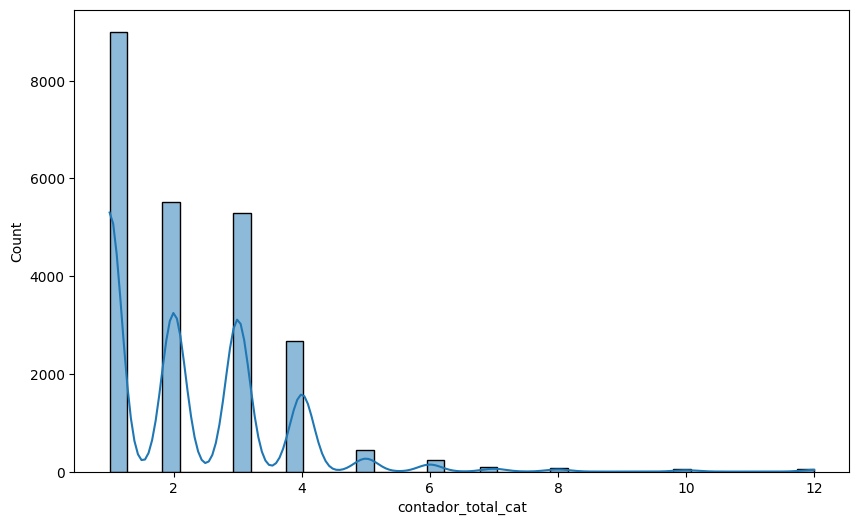

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))

hist = sns.histplot(data=datoscongresoseguimiento, x="contador_total_cat", bins=40, kde=True)
#plt.xlabel('log of hourly wage')
plt.show()

In [ ]:
# Eliminación de columnas

#datoscongresoseguimiento = datoscongresoseguimiento.drop(['min','max'], axis=1)

In [ ]:
# Verificación de la fecha

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
datoscongresoseguimiento.head()

,FECHA,ESTADO PROCESAL,COMISIÓN,DETALLE,ADJUNTOS,enlace,contador,min,max,dias_proceso,contador_total,semanas_proceso,semanas_proceso_cat,contador_total_cat
2,2021-08-03,PRESENTADO,,"LEY QUE MODIFICA EL ARTÍCULO 108-C DEL CÓDIGO PENAL, CON EL INCREMENTO DE LA PENA",SI,https://wb2server.congreso.gob.pe/spley-portal/#/expediente/2021/1,1,2021-08-03,2022-12-28,512,3,3.657143,4.0,1.0
1,2021-08-20,EN COMISIÓN,Justicia y Derechos Humanos,,SI,https://wb2server.congreso.gob.pe/spley-portal/#/expediente/2021/1,2,2021-08-03,2022-12-28,512,3,3.657143,4.0,1.0
0,2022-12-28,Dictamen,Justicia y Derechos Humanos,POR UNANIMIDAD - NO APROBACIÓN Y SU ENVÍO AL ARCHIVO - NO APROBACIÓN (EN RELATORÍA 28/12/2022),SI,https://wb2server.congreso.gob.pe/spley-portal/#/expediente/2021/1,3,2021-08-03,2022-12-28,512,3,3.657143,4.0,1.0
117,2021-08-11,PRESENTADO,,"LEY QUE MODIFICA EL SISTEMA DE PAGO DE DEVENGADO PARA EL IMPUESTO A LA RENTA PARA LAS MICRO, PEQUEÑA Y MEDIANA EMPRESA",SI,https://wb2server.congreso.gob.pe/spley-portal/#/expediente/2021/10,1,2021-08-11,2023-03-13,579,18,4.135714,5.0,4.0
116,2021-08-20,EN COMISIÓN,"Economía, Banca, Finanzas e Inteligencia Financiera Producción, Micro y Pequeña Empresa y Cooperativas",,SI,https://wb2server.congreso.gob.pe/spley-portal/#/expediente/2021/10,2,2021-08-11,2023-03-13,579,18,4.135714,5.0,4.0


In [ ]:
pd.crosstab(datoscongresoseguimiento['contador'],datoscongresoseguimiento['ESTADO PROCESAL'])

ESTADO PROCESAL,.,ACLARACIÓN,APROBADO,APROBADO 1ERA. VOTACIÓN,Acumulado en Sala,Al Archivo,Aprobado Com.Permanente,Autógrafa,Autógrafa observada,Dictamen,Dispensado de Dictamen,Dispensado de Publicación en el Portal,EN AGENDA DE LA COMISIÓN PERMANENTE,EN AGENDA DEL PLENO,EN COMISIÓN,EN CUARTO INTERMEDIO,EN DEBATE - COMISIÓN PERMANENTE,EN DEBATE - PLENO,EN RECONSIDERACIÓN,EXONERADO DE DICTAMEN,EXONERADO DE PLAZO DE PUBLICACIÓN,EXONERADO DE SEGUNDA VOTACIÓN,No alcanzó Nº de votos,Orden del Día,PASA A COMISIÓN,PRESENTADO,Pendiente 2da. votación,Promulgado/Presidente de la República,Promulgado/Presidente del Congreso,Publicada en el Diario Oficial El Peruano,RECHAZADO,RETORNA A COMISIÓN,Rechazado de Plano,Retirado por su Autor,Retiro de Firma,Solicita Retiro,TEXTO SUSTITUTORIO
contador,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1,0,11,3,0,0,0,0,0,3,0,1,0,14,74,0,0,3,0,0,0,0,0,1,0,4720,1,0,4,0,2,0,0,0,1,0,1
2,2,0,16,2,0,5,1,5,0,3,0,1,0,12,4409,1,0,3,0,0,0,0,0,2,0,344,3,2,1,4,0,1,0,17,3,0,1
3,1,0,50,5,0,9,0,6,0,1662,5,1,0,63,400,0,1,18,12,1,0,2,0,5,0,49,4,1,9,5,1,1,1,49,4,2,9
4,0,0,147,49,0,28,0,8,0,444,1,9,0,609,64,0,0,20,15,2,3,0,1,335,3,24,2,9,8,6,2,3,0,2,2,0,7
5,1,0,435,152,2,9,0,11,0,119,0,5,3,341,31,4,0,114,16,1,2,1,4,79,5,4,16,7,2,23,3,4,0,5,2,0,36
6,1,1,239,408,5,5,0,76,0,40,0,1,2,191,9,9,0,131,37,3,0,0,0,19,7,4,3,3,6,6,1,0,0,0,2,0,49
7,1,1,133,228,4,1,0,242,3,19,0,0,3,137,19,15,0,191,31,1,0,0,0,9,5,8,2,50,7,17,4,1,0,0,0,0,59
8,1,0,111,100,6,1,0,303,18,8,0,0,0,63,57,1,0,123,20,0,0,0,0,4,1,11,7,119,62,61,5,0,0,1,0,0,37
9,1,10,53,52,1,0,0,211,42,20,0,0,0,38,88,3,0,95,13,0,0,0,0,3,0,32,1,129,47,146,0,1,0,0,0,0,34


In [ ]:
datoscongresoseguimiento.head(5)

,FECHA,ESTADO PROCESAL,COMISIÓN,DETALLE,ADJUNTOS,enlace,contador,min,max,dias_proceso,contador_total,semanas_proceso,semanas_proceso_cat,contador_total_cat
2,2021-08-03,PRESENTADO,,"LEY QUE MODIFICA EL ARTÍCULO 108-C DEL CÓDIGO PENAL, CON EL INCREMENTO DE LA PENA",SI,https://wb2server.congreso.gob.pe/spley-portal/#/expediente/2021/1,1,2021-08-03,2022-12-28,512,3,3.657143,4.0,1.0
1,2021-08-20,EN COMISIÓN,Justicia y Derechos Humanos,,SI,https://wb2server.congreso.gob.pe/spley-portal/#/expediente/2021/1,2,2021-08-03,2022-12-28,512,3,3.657143,4.0,1.0
0,2022-12-28,Dictamen,Justicia y Derechos Humanos,POR UNANIMIDAD - NO APROBACIÓN Y SU ENVÍO AL ARCHIVO - NO APROBACIÓN (EN RELATORÍA 28/12/2022),SI,https://wb2server.congreso.gob.pe/spley-portal/#/expediente/2021/1,3,2021-08-03,2022-12-28,512,3,3.657143,4.0,1.0
117,2021-08-11,PRESENTADO,,"LEY QUE MODIFICA EL SISTEMA DE PAGO DE DEVENGADO PARA EL IMPUESTO A LA RENTA PARA LAS MICRO, PEQUEÑA Y MEDIANA EMPRESA",SI,https://wb2server.congreso.gob.pe/spley-portal/#/expediente/2021/10,1,2021-08-11,2023-03-13,579,18,4.135714,5.0,4.0
116,2021-08-20,EN COMISIÓN,"Economía, Banca, Finanzas e Inteligencia Financiera Producción, Micro y Pequeña Empresa y Cooperativas",,SI,https://wb2server.congreso.gob.pe/spley-portal/#/expediente/2021/10,2,2021-08-11,2023-03-13,579,18,4.135714,5.0,4.0


## 04 Merge con otras bases

### 04 01 Merge con datos congreso con datos seguimiento

In [ ]:
datoscongreso.shape

(4267, 17)

In [ ]:
datoscongresoseguimiento.shape

(23461, 14)

In [ ]:
#boolean = df.duplicated(subset=['enlace']).any()
#boolean

In [ ]:
df=pd.merge(datoscongreso, datoscongresoseguimiento[['contador_total','dias_proceso','enlace','semanas_proceso', 'semanas_proceso_cat', 'contador_total_cat', 'max']].drop_duplicates(subset='enlace', keep='last'), on="enlace", how="left", indicator=True)
df.head(2)

,titulo,periodo,legisla,fechapresenta,proponente,sumilla,observaciones,autor,coautor,adherentes,grupoparla,comisiones,ultimoestado,estadoscrap,autorlink,fecha,enlace,contador_total,dias_proceso,semanas_proceso,semanas_proceso_cat,contador_total_cat,max,_merge
0,PROYECTO DE LEY N° 00003/2021-CR,2021-2026,Primera Legislatura Ordinaria 2021,05/08/2021,Congreso,PROPONE REFORMA CONSTITUCIONAL DEL ARTÍCULO 133 SOBRE LA CUESTIÓN DE CONFIANZA,LEY QUE DESARROLLA EL EJERCICIO DE LA CUESTIÓN DE CONFIANZA REGULADA EN EL ÚLTIMO PÁRRAFO DEL ARTÍCULO 132 Y EN EL ARTÍCULO 133 DE LA CONSTITUCIÓN POLÍTICA DEL PERÚ,LUNA GÁLVEZ JOSÉ LEÓN,"Wong Pujada, Enrique",- -,Podemos Perú,Constitución y Reglamento,Publicada en el Diario Oficial El Peruano (Seguimientos),yes,https://www.congreso.gob.pe/congresistas2021/JoseLuna/,02/05/2023 17:32:29,https://wb2server.congreso.gob.pe/spley-portal/#/expediente/2021/3,20,77,0.550000,1.0,4.0,2021-10-21,both
1,PROYECTO DE LEY N° 00004/2021-CR,2021-2026,Primera Legislatura Ordinaria 2021,10/08/2021,Congreso,"PROPONE DECLARAR DE NECESIDAD PÚBLICA E INTERÉS NACIONAL LA RECUPERACIÓN, CONSERVACIÓN Y PROTECCIÓN DE LA PESCA ANCESTRAL EN CABALLITO DE TOTORA Y LA CREACIÓN DE LOS BALSARES EN EL DISTRITO DE PIMENTEL, PROVINCIA DE CHICLAYO, DEPARTAMENTO DE LAMBAYEQUE.","LEY QUE DECLARA DE INTERÉS NACIONAL AL RECUPERACIÓN, CONSERVACIÓN Y PROTECCIÓN DE LA PESCA ANCESTRAL EN CABALLITO DE TOTORA Y LA CREACIÓN DE BALSARES PARA EL CULTIVO DE TOTORA, EN EL DISTRITO DE PIMENTEL, PROVINCIA DE CHICLAYO, DEPARTAMENTO DE LAMBAYEQUE",CÓRDOVA LOBATÓN MARÍA JESSICA,"Cueto Aservi, José Ernesto",- -,Renovación Popular,"Producción, Micro y Pequeña Empresa y Cooperativas",Publicada en el Diario Oficial El Peruano (Seguimientos),yes,https://www.congreso.gob.pe/congresistas2021/MariaCordova/,02/05/2023 17:32:32,https://wb2server.congreso.gob.pe/spley-portal/#/expediente/2021/4,14,269,1.921429,2.0,3.0,2022-05-06,both


In [ ]:
#duplicates = df[df.duplicated(subset='enlace')]
#duplicates

In [ ]:
df['_merge'].value_counts()

both          4267
left_only        0
right_only       0
Name: _merge, dtype: int64

In [ ]:
df = df.drop(['_merge'], axis=1)

In [ ]:
###############################################################################################################################

### 04 02 Merge datos congreso con datos congresistas

In [ ]:
df['autor']

0                      LUNA GÁLVEZ JOSÉ LEÓN
1              CÓRDOVA LOBATÓN MARÍA JESSICA
2       BAZÁN CALDERÓN DIEGO ALONSO FERNANDO
3                  ARAGÓN CARREÑO LUIS ÁNGEL
4                  MUÑANTE BARRIOS ALEJANDRO
                        ...                 
4262          CASTILLO RIVAS EDUARDO ENRIQUE
4263          CASTILLO RIVAS EDUARDO ENRIQUE
4264          CASTILLO RIVAS EDUARDO ENRIQUE
4265          CASTILLO RIVAS EDUARDO ENRIQUE
4266          CASTILLO RIVAS EDUARDO ENRIQUE
Name: autor, Length: 4267, dtype: object

In [ ]:
list_1 = df['autor'].str.replace(',','').unique() #keys
list_2 = datoscongresistas['nombre'][(datoscongresistas['nombre']!='') & (datoscongresistas['fin'].str.contains('2026|2027|2028')==True)].unique() 

bb = match_phrases_target(list_1, list_2, nn = 1)

In [ ]:
print('list_1',list_1.shape)
print('list_2',list_2.shape)
bb

list_1 (133,)
list_2 (133,)


,index,list_1_phrases,list_2_ccpp,combination,ratio
0,24,LUNA GÁLVEZ JOSÉ LEÓN,JOSÉ LEÓN LUNA GÁLVEZ,JOSÉ LEÓN LUNA GÁLVEZ,1.00
1,85,CÓRDOVA LOBATÓN MARÍA JESSICA,MARÍA JESSICA CÓRDOVA LOBATÓN,MARÍA JESSICA CÓRDOVA LOBATÓN,1.00
2,38,BAZÁN CALDERÓN DIEGO ALONSO FERNANDO,DIEGO ALONSO FERNANDO BAZÁN CALDERÓN,DIEGO ALONSO FERNANDO BAZÁN CALDERÓN,1.00
3,46,ARAGÓN CARREÑO LUIS ÁNGEL,LUIS ÁNGEL ARAGÓN CARREÑO,LUIS ÁNGEL ARAGÓN CARREÑO,1.00
4,8,MUÑANTE BARRIOS ALEJANDRO,ALEJANDRO MUÑANTE BARRIOS,ALEJANDRO MUÑANTE BARRIOS,1.00
...,...,...,...,...,...
128,75,VALER PINTO HÉCTOR,HÉCTOR VALER PINTO,HÉCTOR VALER PINTO,1.00
129,10,ARRIOLA TUEROS JOSÉ ALBERTO,JOSÉ ALBERTO ARRIOLA TUEROS,JOSÉ ALBERTO ARRIOLA TUEROS,1.00
130,72,BERMEJO ROJAS GUILLERMO,GUILLERMO BERMEJO ROJAS,GUILLERMO BERMEJO ROJAS,1.00
131,131,PAZO NUNURA JOSE BERNARDO,JOSÉ BERNARDO PAZO NUNURA,JOSE BERNARDO PAZO NUNURA,0.96


In [ ]:
bb = bb[['list_1_phrases', 'list_2_ccpp']]
bb.columns = ['key_autor', 'key_congresista']
bb

,key_autor,key_congresista
0,LUNA GÁLVEZ JOSÉ LEÓN,JOSÉ LEÓN LUNA GÁLVEZ
1,CÓRDOVA LOBATÓN MARÍA JESSICA,MARÍA JESSICA CÓRDOVA LOBATÓN
2,BAZÁN CALDERÓN DIEGO ALONSO FERNANDO,DIEGO ALONSO FERNANDO BAZÁN CALDERÓN
3,ARAGÓN CARREÑO LUIS ÁNGEL,LUIS ÁNGEL ARAGÓN CARREÑO
4,MUÑANTE BARRIOS ALEJANDRO,ALEJANDRO MUÑANTE BARRIOS
...,...,...
128,VALER PINTO HÉCTOR,HÉCTOR VALER PINTO
129,ARRIOLA TUEROS JOSÉ ALBERTO,JOSÉ ALBERTO ARRIOLA TUEROS
130,BERMEJO ROJAS GUILLERMO,GUILLERMO BERMEJO ROJAS
131,PAZO NUNURA JOSE BERNARDO,JOSÉ BERNARDO PAZO NUNURA


In [ ]:
df1 = pd.merge(df, bb, left_on="autor", right_on="key_autor", how="left", indicator=True)
df1.head(4)

,titulo,periodo,legisla,fechapresenta,proponente,sumilla,observaciones,autor,coautor,adherentes,grupoparla,comisiones,ultimoestado,estadoscrap,autorlink,fecha,enlace,contador_total,dias_proceso,semanas_proceso,semanas_proceso_cat,contador_total_cat,max,key_autor,key_congresista,_merge
0,PROYECTO DE LEY N° 00003/2021-CR,2021-2026,Primera Legislatura Ordinaria 2021,05/08/2021,Congreso,PROPONE REFORMA CONSTITUCIONAL DEL ARTÍCULO 133 SOBRE LA CUESTIÓN DE CONFIANZA,LEY QUE DESARROLLA EL EJERCICIO DE LA CUESTIÓN DE CONFIANZA REGULADA EN EL ÚLTIMO PÁRRAFO DEL ARTÍCULO 132 Y EN EL ARTÍCULO 133 DE LA CONSTITUCIÓN POLÍTICA DEL PERÚ,LUNA GÁLVEZ JOSÉ LEÓN,"Wong Pujada, Enrique",- -,Podemos Perú,Constitución y Reglamento,Publicada en el Diario Oficial El Peruano (Seguimientos),yes,https://www.congreso.gob.pe/congresistas2021/JoseLuna/,02/05/2023 17:32:29,https://wb2server.congreso.gob.pe/spley-portal/#/expediente/2021/3,20,77,0.550000,1.0,4.0,2021-10-21,LUNA GÁLVEZ JOSÉ LEÓN,JOSÉ LEÓN LUNA GÁLVEZ,both
1,PROYECTO DE LEY N° 00004/2021-CR,2021-2026,Primera Legislatura Ordinaria 2021,10/08/2021,Congreso,"PROPONE DECLARAR DE NECESIDAD PÚBLICA E INTERÉS NACIONAL LA RECUPERACIÓN, CONSERVACIÓN Y PROTECCIÓN DE LA PESCA ANCESTRAL EN CABALLITO DE TOTORA Y LA CREACIÓN DE LOS BALSARES EN EL DISTRITO DE PIMENTEL, PROVINCIA DE CHICLAYO, DEPARTAMENTO DE LAMBAYEQUE.","LEY QUE DECLARA DE INTERÉS NACIONAL AL RECUPERACIÓN, CONSERVACIÓN Y PROTECCIÓN DE LA PESCA ANCESTRAL EN CABALLITO DE TOTORA Y LA CREACIÓN DE BALSARES PARA EL CULTIVO DE TOTORA, EN EL DISTRITO DE PIMENTEL, PROVINCIA DE CHICLAYO, DEPARTAMENTO DE LAMBAYEQUE",CÓRDOVA LOBATÓN MARÍA JESSICA,"Cueto Aservi, José Ernesto",- -,Renovación Popular,"Producción, Micro y Pequeña Empresa y Cooperativas",Publicada en el Diario Oficial El Peruano (Seguimientos),yes,https://www.congreso.gob.pe/congresistas2021/MariaCordova/,02/05/2023 17:32:32,https://wb2server.congreso.gob.pe/spley-portal/#/expediente/2021/4,14,269,1.921429,2.0,3.0,2022-05-06,CÓRDOVA LOBATÓN MARÍA JESSICA,MARÍA JESSICA CÓRDOVA LOBATÓN,both
2,PROYECTO DE LEY N° 00005/2021-CR,2021-2026,Primera Legislatura Ordinaria 2021,10/08/2021,Congreso,"PROPONE MODIFICAR EL ARTÍCULO 8, NUMERAL 2) LITERAL I) DE LA LEY 29158 LEY ORGÁNICA DEL PODER EJECUTIVO.","LEY QUE MODIFICA LA LEY 29158, LEY ORGÁNICA DEL PODER EJECUTIVO, CON LA FINALIDAD DE ESTABLECER PROCEDIMIENTOS PARA EL NOMBRAMIENTO DE MINISTROS Y VICEMINISTROS, Y ATRIBUCIONES DEL CONSEJO DE MINISTROS",BAZÁN CALDERÓN DIEGO ALONSO FERNANDO,"Cueto Aservi, José Ernesto",- -,Renovación Popular,"Descentralización, Regionalización, Gobiernos Locales y Modernización de la Gestión del Estado",Publicada en el Diario Oficial El Peruano (Seguimientos),yes,https://www.congreso.gob.pe/congresistas2021/DiegoBazan/,02/05/2023 17:32:35,https://wb2server.congreso.gob.pe/spley-portal/#/expediente/2021/5,20,255,1.821429,2.0,4.0,2022-04-22,BAZÁN CALDERÓN DIEGO ALONSO FERNANDO,DIEGO ALONSO FERNANDO BAZÁN CALDERÓN,both
3,PROYECTO DE LEY N° 00006/2021-CR,2021-2026,Primera Legislatura Ordinaria 2021,10/08/2021,Congreso,PROPONE INTERPRETAR EL USO DE LA CUESTIÓN DE CONFIANZA REGULADA EN LOS ARTÍCULOS 132 Y 133 DE LA CONSTITUCIÓN POLÍTICA DEL PERÚ.,LEY QUE DESARROLLA EL EJERCICIO DE LA CUESTIÓN DE CONFIANZA REGULADA EN EL ÚLTIMO PÁRRAFO DEL ARTÍCULO 132 Y EN EL ARTÍCULO 133 DE LA CONSTITUCIÓN POLÍTICA DEL PERÚ,ARAGÓN CARREÑO LUIS ÁNGEL,"Soto Palacios, Wilson",- -,Acción Popular,Constitución y Reglamento,Publicada en el Diario Oficial El Peruano (Seguimientos),yes,https://www.congreso.gob.pe/congresistas2021/LuisAragon/,02/05/2023 17:32:38,https://wb2server.congreso.gob.pe/spley-portal/#/expediente/2021/6,20,72,0.514286,1.0,4.0,2021-10-21,ARAGÓN CARREÑO LUIS ÁNGEL,LUIS ÁNGEL ARAGÓN CARREÑO,both


In [ ]:
df1._merge.value_counts()

both          4267
left_only        0
right_only       0
Name: _merge, dtype: int64

In [ ]:
df1 = df1.drop(['_merge'], axis=1)

In [ ]:
df2 = pd.merge(df1, datoscongresistas[['nombre','votacion','inicio','fin','grupopartido','bancada','representa','condicion']][(datoscongresistas['nombre']!='') & (datoscongresistas['fin'].str.contains('2026|2027|2028')==True)], 
               left_on="key_congresista", right_on="nombre", how="left", indicator=True)

In [ ]:
df2.shape

(4267, 34)

In [ ]:
df2.head()

,titulo,periodo,legisla,fechapresenta,proponente,sumilla,observaciones,autor,coautor,adherentes,grupoparla,comisiones,ultimoestado,estadoscrap,autorlink,fecha,enlace,contador_total,dias_proceso,semanas_proceso,semanas_proceso_cat,contador_total_cat,max,key_autor,key_congresista,nombre,votacion,inicio,fin,grupopartido,bancada,representa,condicion,_merge
0,PROYECTO DE LEY N° 00003/2021-CR,2021-2026,Primera Legislatura Ordinaria 2021,05/08/2021,Congreso,PROPONE REFORMA CONSTITUCIONAL DEL ARTÍCULO 133 SOBRE LA CUESTIÓN DE CONFIANZA,LEY QUE DESARROLLA EL EJERCICIO DE LA CUESTIÓN DE CONFIANZA REGULADA EN EL ÚLTIMO PÁRRAFO DEL ARTÍCULO 132 Y EN EL ARTÍCULO 133 DE LA CONSTITUCIÓN POLÍTICA DEL PERÚ,LUNA GÁLVEZ JOSÉ LEÓN,"Wong Pujada, Enrique",- -,Podemos Perú,Constitución y Reglamento,Publicada en el Diario Oficial El Peruano (Seguimientos),yes,https://www.congreso.gob.pe/congresistas2021/JoseLuna/,02/05/2023 17:32:29,https://wb2server.congreso.gob.pe/spley-portal/#/expediente/2021/3,20,77,0.550000,1.0,4.0,2021-10-21,LUNA GÁLVEZ JOSÉ LEÓN,JOSÉ LEÓN LUNA GÁLVEZ,JOSÉ LEÓN LUNA GÁLVEZ,91055,26-jul-2021,27-jul-2026,Podemos Perú,PODEMOS PERÚ,Lima,en Ejercicio,both
1,PROYECTO DE LEY N° 00004/2021-CR,2021-2026,Primera Legislatura Ordinaria 2021,10/08/2021,Congreso,"PROPONE DECLARAR DE NECESIDAD PÚBLICA E INTERÉS NACIONAL LA RECUPERACIÓN, CONSERVACIÓN Y PROTECCIÓN DE LA PESCA ANCESTRAL EN CABALLITO DE TOTORA Y LA CREACIÓN DE LOS BALSARES EN EL DISTRITO DE PIMENTEL, PROVINCIA DE CHICLAYO, DEPARTAMENTO DE LAMBAYEQUE.","LEY QUE DECLARA DE INTERÉS NACIONAL AL RECUPERACIÓN, CONSERVACIÓN Y PROTECCIÓN DE LA PESCA ANCESTRAL EN CABALLITO DE TOTORA Y LA CREACIÓN DE BALSARES PARA EL CULTIVO DE TOTORA, EN EL DISTRITO DE PIMENTEL, PROVINCIA DE CHICLAYO, DEPARTAMENTO DE LAMBAYEQUE",CÓRDOVA LOBATÓN MARÍA JESSICA,"Cueto Aservi, José Ernesto",- -,Renovación Popular,"Producción, Micro y Pequeña Empresa y Cooperativas",Publicada en el Diario Oficial El Peruano (Seguimientos),yes,https://www.congreso.gob.pe/congresistas2021/MariaCordova/,02/05/2023 17:32:32,https://wb2server.congreso.gob.pe/spley-portal/#/expediente/2021/4,14,269,1.921429,2.0,3.0,2022-05-06,CÓRDOVA LOBATÓN MARÍA JESSICA,MARÍA JESSICA CÓRDOVA LOBATÓN,MARÍA JESSICA CÓRDOVA LOBATÓN,12552,26-jul-2021,27-jul-2026,Renovación Popular,AVANZA PAÍS - PARTIDO DE INTEGRACIÓN SOCIAL,Lambayeque,en Ejercicio,both
2,PROYECTO DE LEY N° 00005/2021-CR,2021-2026,Primera Legislatura Ordinaria 2021,10/08/2021,Congreso,"PROPONE MODIFICAR EL ARTÍCULO 8, NUMERAL 2) LITERAL I) DE LA LEY 29158 LEY ORGÁNICA DEL PODER EJECUTIVO.","LEY QUE MODIFICA LA LEY 29158, LEY ORGÁNICA DEL PODER EJECUTIVO, CON LA FINALIDAD DE ESTABLECER PROCEDIMIENTOS PARA EL NOMBRAMIENTO DE MINISTROS Y VICEMINISTROS, Y ATRIBUCIONES DEL CONSEJO DE MINISTROS",BAZÁN CALDERÓN DIEGO ALONSO FERNANDO,"Cueto Aservi, José Ernesto",- -,Renovación Popular,"Descentralización, Regionalización, Gobiernos Locales y Modernización de la Gestión del Estado",Publicada en el Diario Oficial El Peruano (Seguimientos),yes,https://www.congreso.gob.pe/congresistas2021/DiegoBazan/,02/05/2023 17:32:35,https://wb2server.congreso.gob.pe/spley-portal/#/expediente/2021/5,20,255,1.821429,2.0,4.0,2022-04-22,BAZÁN CALDERÓN DIEGO ALONSO FERNANDO,DIEGO ALONSO FERNANDO BAZÁN CALDERÓN,DIEGO ALONSO FERNANDO BAZÁN CALDERÓN,222,26-jul-2021,27-jul-2026,Renovación Popular,AVANZA PAÍS - PARTIDO DE INTEGRACIÓN SOCIAL,La Libertad,en Ejercicio,both
3,PROYECTO DE LEY N° 00006/2021-CR,2021-2026,Primera Legislatura Ordinaria 2021,10/08/2021,Congreso,PROPONE INTERPRETAR EL USO DE LA CUESTIÓN DE CONFIANZA REGULADA EN LOS ARTÍCULOS 132 Y 133 DE LA CONSTITUCIÓN POLÍTICA DEL PERÚ.,LEY QUE DESARROLLA EL EJERCICIO DE LA CUESTIÓN DE CONFIANZA REGULADA EN EL ÚLTIMO PÁRRAFO DEL ARTÍCULO 132 Y EN EL ARTÍCULO 133 DE LA CONSTITUCIÓN POLÍTICA DEL PERÚ,ARAGÓN CARREÑO LUIS ÁNGEL,"Soto Palacios, Wilson",- -,Acción Popular,Constitución y Reglamento,Publicada en el Diario Oficial El Peruano (Seguimientos),yes,https://ww

In [ ]:
df2 = df2.drop(['_merge'], axis=1)

## 05 target

In [ ]:
df2['target'] = np.where((df2['ultimoestado']=='Autógrafa (Seguimientos)') | 
 (df2['ultimoestado']=='Publicada en el Diario Oficial El Peruano (Seguimientos)'), 1, 0)

In [ ]:
df2.ultimoestado.value_counts()

EN COMISIÓN (Seguimientos)                                  2446
Publicada en el Diario Oficial El Peruano (Seguimientos)     649
Dictamen (Seguimientos)                                      481
Orden del Día (Seguimientos)                                 193
EN AGENDA DEL PLENO (Seguimientos)                           189
Retirado por su Autor (Seguimientos)                          70
APROBADO (Seguimientos)                                       65
Autógrafa (Seguimientos)                                      47
Al Archivo (Seguimientos)                                     36
EN RECONSIDERACIÓN (Seguimientos)                             33
EN DEBATE - PLENO (Seguimientos)                              19
EN CUARTO INTERMEDIO (Seguimientos)                           11
PRESENTADO (Seguimientos)                                      8
APROBADO 1ERA. VOTACIÓN (Seguimientos)                         8
ACLARACIÓN (Seguimientos)                                      7
PASA A COMISIÓN (Seguimie

In [ ]:
pd.crosstab(df2.ultimoestado, df2.target)

target,0,1
ultimoestado,,
ACLARACIÓN (Seguimientos),7,0
APROBADO (Seguimientos),65,0
APROBADO 1ERA. VOTACIÓN (Seguimientos),8,0
Al Archivo (Seguimientos),36,0
Autógrafa (Seguimientos),0,47
Dictamen (Seguimientos),481,0
EN AGENDA DEL PLENO (Seguimientos),189,0
EN COMISIÓN (Seguimientos),2446,0
EN CUARTO INTERMEDIO (Seguimientos),11,0


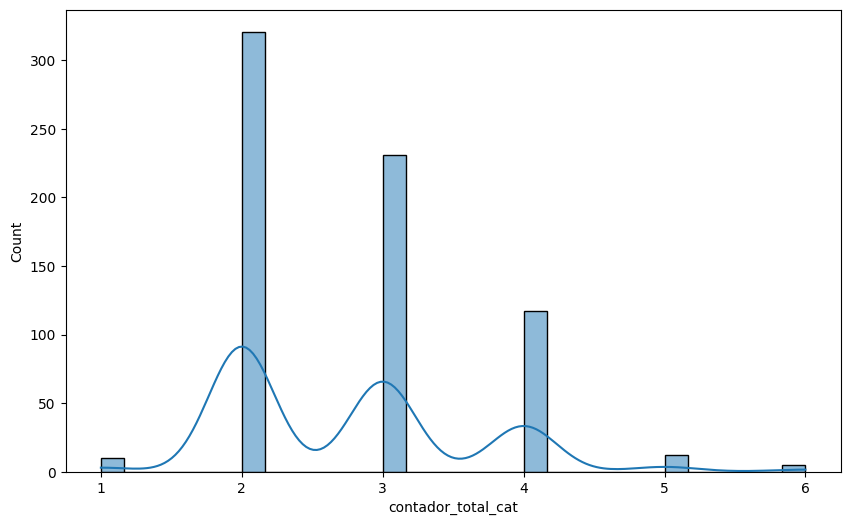

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))

hist = sns.histplot(data=df2[df2['target']==1], x="contador_total_cat", bins=30, kde=True)
#plt.xlabel('log of hourly wage')
plt.show()

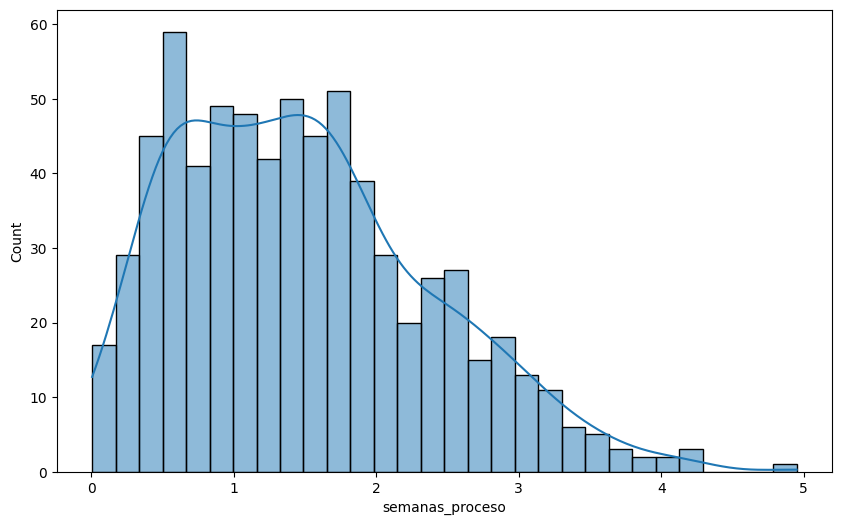

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))

hist = sns.histplot(data=df2[df2['target']==1], x="semanas_proceso", bins=30, kde=True)
#plt.xlabel('log of hourly wage')
plt.show()

In [ ]:
'''
fig, ax = plt.subplots(figsize=(10,6))

hist = sns.histplot(data=df2[df2['target']==0], x="brecha_fecha", bins=30, kde=True)
#plt.xlabel('log of hourly wage')
plt.show()
'''

'\nfig, ax = plt.subplots(figsize=(10,6))\n\nhist = sns.histplot(data=df2[df2[\'target\']==0], x="brecha_fecha", bins=30, kde=True)\n#plt.xlabel(\'log of hourly wage\')\nplt.show()\n'

<Axes: xlabel='contador_total', ylabel='Density'>

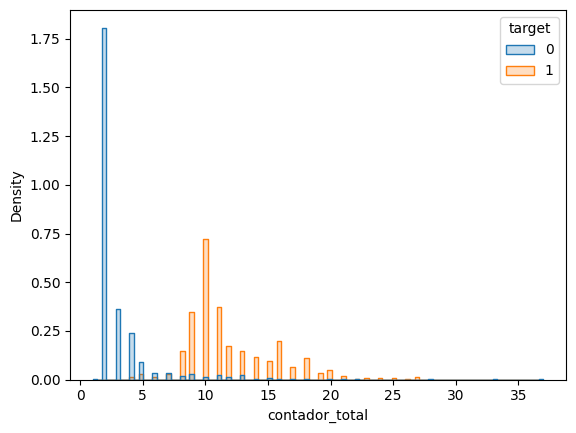

In [ ]:
sns.histplot(
    df2, x="contador_total", hue="target", element="step",
    stat="density", common_norm=False,
)

<Axes: xlabel='semanas_proceso', ylabel='Density'>

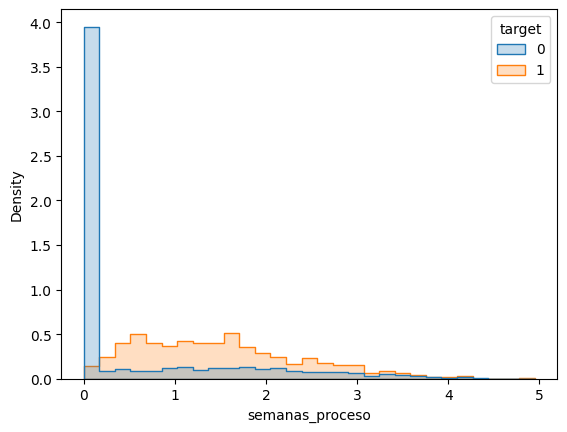

In [ ]:
sns.histplot(
    df2, x="semanas_proceso", hue="target", element="step",
    stat="density", common_norm=False,
)

## 06 Preparar datos

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import cohen_kappa_score, make_scorer, log_loss
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import metrics


In [ ]:
df2.columns

Index(['titulo', 'periodo', 'legisla', 'fechapresenta', 'proponente',
       'sumilla', 'observaciones', 'autor', 'coautor', 'adherentes',
       'grupoparla', 'comisiones', 'ultimoestado', 'estadoscrap', 'autorlink',
       'fecha', 'enlace', 'contador_total', 'dias_proceso', 'semanas_proceso',
       'semanas_proceso_cat', 'contador_total_cat', 'max', 'key_autor',
       'key_congresista', 'nombre', 'votacion', 'inicio', 'fin',
       'grupopartido', 'bancada', 'representa', 'condicion', 'target'],
      dtype='object')

In [ ]:
df2.condicion.value_counts()

en Ejercicio                               4207
Destituído                                   27
Suspendido por Acusación Constitucional      22
Suspendido                                   10
Fallecido                                     1
Name: condicion, dtype: int64

In [ ]:
# Creación de nuevas variables
#----------------------------

In [ ]:
df2['brecha_fecha'] = (datetime.now() - df2['max']).dt.days

In [ ]:
df2['brecha_fecha'].describe()

count    4267.000000
mean      226.111554
std       152.513035
min        35.000000
25%        88.000000
50%       194.000000
75%       331.000000
max       655.000000
Name: brecha_fecha, dtype: float64

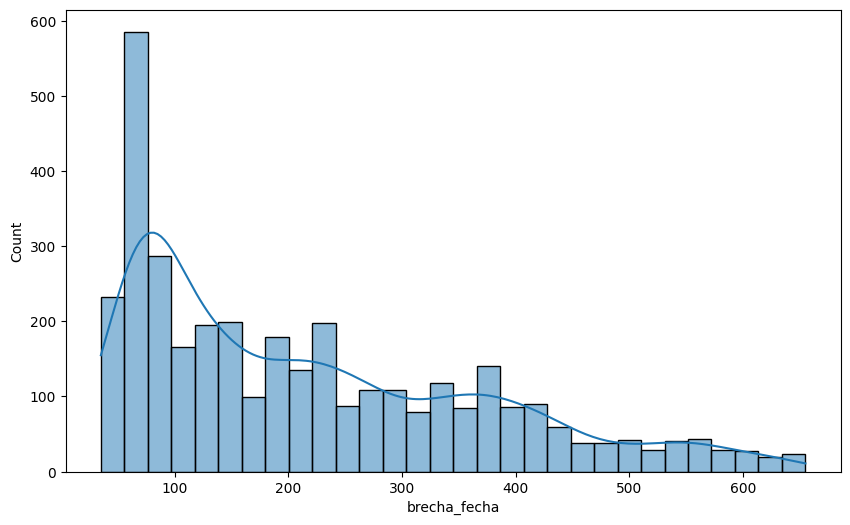

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))

hist = sns.histplot(data=df2[df2['target']==0], x="brecha_fecha", bins=30, kde=True)
#plt.xlabel('log of hourly wage')
plt.show()

In [ ]:
# Creación variable: contador^2

df2['contador2'] = df2['contador_total']*df2['contador_total']

# Creación variable: dias_proceso^2

df2['dias_proceso2'] = df2['dias_proceso']*df2['dias_proceso']

In [ ]:
##########################################

In [ ]:
df21 = df2[['autor','grupoparla', 'comisiones', 'contador_total', 'dias_proceso','votacion','representa', 'condicion', 'target']]

# Solo sirve para el loop 
df21_base = df2[['autor','grupoparla', 'comisiones', 'contador_total', 'dias_proceso','votacion','representa', 'condicion', 'target','contador2','dias_proceso2','semanas_proceso_cat','contador_total_cat']]

In [ ]:
oenc=OneHotEncoder(drop='first') #evitar multicolinealidad
multiple_enc=oenc.fit_transform(df21[['autor','grupoparla', 'comisiones','representa', 'condicion']])# onehotencoding on 3 features

multiple_enc=multiple_enc.toarray()

#oenc.get_feature_names() use this method to get column names
multiple_enc=pd.DataFrame(multiple_enc,columns=oenc.get_feature_names_out())

df21enc=pd.concat([df21[['target','contador_total','dias_proceso','votacion']],multiple_enc],axis=1) # append to original dataframe

In [ ]:
# Solo sirve para el loop
df21enc_base=pd.concat([df21_base[['target','contador_total','dias_proceso','votacion','contador2','dias_proceso2','semanas_proceso_cat','contador_total_cat']],multiple_enc],axis=1) # append to original datafram

In [ ]:
df21enc.head(4)

,target,contador_total,dias_proceso,votacion,autor_ACUÑA PERALTA SEGUNDO HÉCTOR,autor_AGUINAGA RECUENCO ALEJANDRO AURELIO,autor_AGÜERO GUTIÉRREZ MARÍA ANTONIETA,autor_ALCARRAZ AGÜERO YOREL KIRA,autor_ALEGRÍA GARCÍA ARTURO,autor_ALVA PRIETO MARÍA DEL CARMEN,autor_ALVA ROJAS CARLOS ENRIQUE,autor_AMURUZ DULANTO YESSICA ROSSELLI,autor_ANDERSON RAMÍREZ CARLOS ANTONIO,autor_ARAGÓN CARREÑO LUIS ÁNGEL,autor_ARRIOLA TUEROS JOSÉ ALBERTO,autor_AZURÍN LOAYZA ALFREDO,autor_BALCÁZAR ZELADA JOSÉ MARÍA,autor_BARBARÁN REYES ROSANGELLA ANDREA,autor_BAZÁN CALDERÓN DIEGO ALONSO FERNANDO,autor_BAZÁN NARRO SIGRID TESORO,autor_BELLIDO UGARTE GUIDO,autor_BERMEJO ROJAS GUILLERMO,autor_BURGOS OLIVEROS JUAN BARTOLOMÉ,autor_BUSTAMANTE DONAYRE CARLOS ERNESTO,autor_CALLE LOBATÓN DIGNA,autor_CAMONES SORIANO LADY MERCEDES,autor_CASTILLO RIVAS EDUARDO ENRIQUE,autor_CAVERO ALVA ALEJANDRO ENRIQUE,autor_CERRÓN ROJAS WALDEMAR JOSÉ,autor_CHACÓN TRUJILLO NILZA MERLY,autor_CHIABRA LEÓN ROBERTO ENRIQUE,autor_CHIRINOS VENEGAS PATRICIA ROSA,autor_CHÁVEZ CHINO BETSSY BETZABET,autor_CICCIA VÁSQUEZ MIGUEL ÁNGEL,autor_COAYLA JUÁREZ JORGE SAMUEL,autor_CORDERO JON TAY LUIS GUSTAVO,autor_CORDERO JON TAY MARÍA DEL PILAR,autor_CORTEZ AGUIRRE ISABEL,autor_CRUZ MAMANI FLAVIO,autor_CUETO ASERVI JOSÉ ERNESTO,autor_CUTIPA CCAMA VÍCTOR RAÚL,autor_CÓRDOVA LOBATÓN MARÍA JESSICA,autor_DOROTEO CARBAJO RAÚL FELIPE,autor_DÁVILA ATANACIO PASIÓN NEOMÍAS,autor_DÍAZ MONAGO FREDDY ROLAND,autor_ECHAÍZ DE NÚÑEZ IZAGA GLADYS MARGOT,autor_ECHEVERRÍA RODRÍGUEZ HAMLET,autor_ELERA GARCÍA WILMAR ALBERTO,autor_ELÍAS ÁVALOS JOSÉ LUIS,autor_ESPINOZA VARGAS JHAEC DARWIN,autor_FLORES ANCACHI JORGE LUIS,autor_FLORES RAMÍREZ ALEX RANDU,autor_FLORES RUIZ VÍCTOR SEFERINO,autor_GARCÍA CORREA IDELSO MANUEL,autor_GONZA CASTILLO AMÉRICO,autor_GONZALES DELGADO DIANA CAROLINA,autor_GUERRA GARCÍA CAMPOS HERNANDO,autor_GUTIÉRREZ TICONA PAUL SILVIO,autor_HEIDINGER BALLESTEROS NELCY LIDIA,autor_HERRERA MAMANI FERNANDO MARIO,autor_HERRERA MEDINA NOELIA ROSSVITH,autor_HUAMÁN CORONADO RAÚL,autor_INFANTES CASTAÑEDA MERY ELIANA,autor_JERÍ ORÉ JOSÉ ENRIQUE,autor_JIMÉNEZ HEREDIA DAVID JULIO,autor_JULÓN IRIGOÍN ELVA EDHIT,autor_JUÁREZ CALLE HEIDY LISBETH,autor_JUÁREZ GALLEGOS CARMEN PATRICIA,autor_JÁUREGUI MARTÍNEZ DE AGUAYO MARÍA DE LOS MILAGROS JACKELINE,autor_KAMICHE MORANTE LUIS ROBERTO,autor_LIMACHI QUISPE NIEVES ESMERALDA,autor_LIZARZABURU LIZARZABURU JUAN CARLOS MARTIN,autor_LUNA GÁLVEZ JOSÉ LEÓN,autor_LUQUE IBARRA RUTH,autor_LÓPEZ MORALES JENY LUZ,autor_LÓPEZ UREÑA ILICH FREDY,autor_MARTICORENA MENDOZA JORGE ALFONSO,autor_MARTÍNEZ TALAVERA PEDRO EDWIN,autor_MEDINA HERMOSILLA ELIZABETH SARA,autor_MEDINA MINAYA ESDRAS RICARDO,autor_MONTALVO CUBAS SEGUNDO TORIBIO,autor_MONTEZA FACHO SILVIA MARÍA,autor_MONTOYA MANRIQUE JORGE CARLOS,autor_MORANTE FIGARI JORGE ALBERTO,autor_MORI CELIS JUAN CARLOS,autor_MOYANO DELGADO MARTHA LUPE,autor_MUÑANTE BARRIOS ALEJANDRO,autor_MÁLAGA TRILLO GEORGE EDWARD,autor_OBANDO MORGAN AURISTELA ANA,autor_OLIVOS MARTÍNEZ VIVIAN,autor_PABLO MEDINA FLOR AIDEE,autor_PADILLA ROMERO JAVIER ROMMEL,autor_PALACIOS HUAMÁN MARGOT,autor_PAREDES CASTRO FRANCIS JHASMINA,autor_PAREDES FONSECA KAROL IVETT,autor_PAREDES GONZALES ALEX ANTONIO,autor_PAREDES PIQUÉ SUSEL ANA MARÍA,autor_PARIONA SINCHE ALFREDO,autor_PAZO NUNURA JOSE BERNARDO,autor_PICÓN QUEDO LUIS RAÚL,autor_PORTALATINO ÁVALOS KELLY ROXANA,autor_PORTERO LÓPEZ HILDA MARLENY,autor_QUIROZ BARBOZA SEGUNDO TEODOMIRO,autor_QUISPE MAMANI WILSON RUSBEL,autor_QUITO SARMIENTO BERNARDO JAIME,autor_RAMÍREZ GARCÍA TANIA ESTEFANY,autor_REVILLA VILLANUEVA CÉSAR MANUEL,autor_REYES CAM ABEL AUGUSTO,autor_REYMUNDO MERCADO EDGARD CORNELIO,autor_RIVAS CHACARA JANET MILAGROS,autor_ROBLES ARAUJO SILVANA EMPERATRIZ,autor_RUÍZ RODRÍGUEZ MAGALY ROSMERY,autor_SAAVEDRA CASTERNOQUE HITLER,autor_SALHUANA CAVIDES EDUARDO,autor_SOTO PALACIOS WILSON,autor_SOTO REYES ALEJANDRO,autor_SÁNCHEZ PALOMINO ROBERTO HELBERT,autor_TACURI VALDIVIA GERMÁN ADOLFO,autor_TAIPE CORONADO MARÍA ELIZABET



```
# Esto tiene formato de código
```

## 07 Balancear clase

In [ ]:
df21enc.target.value_counts()

0    3571
1     696
Name: target, dtype: int64

In [ ]:
df_min = df21enc[df21enc['target']==1]
df_may = df21enc[df21enc['target']==0]
df_min.shape

(696, 209)

In [ ]:
df_may.shape

(3571, 209)

**Con oversampling**


```
# Tiene formato de código
```



In [ ]:
df_min_up = df_min[df_min['target']==1].sample(n=3851, replace=True, random_state=123)
df_min_up.shape

df3 = pd.concat([df_may, df_min_up])
df3.shape
df3.target.value_counts(normalize=True)
df3.target.value_counts()


1    3851
0    3571
Name: target, dtype: int64

In [ ]:
df3.columns

Index(['target', 'contador_total', 'dias_proceso', 'votacion',
       'autor_ACUÑA PERALTA SEGUNDO HÉCTOR',
       'autor_AGUINAGA RECUENCO ALEJANDRO AURELIO',
       'autor_AGÜERO GUTIÉRREZ MARÍA ANTONIETA',
       'autor_ALCARRAZ AGÜERO YOREL KIRA', 'autor_ALEGRÍA GARCÍA ARTURO',
       'autor_ALVA PRIETO MARÍA DEL CARMEN',
       ...
       'representa_Puno', 'representa_San Martín', 'representa_Tacna',
       'representa_Tumbes', 'representa_Ucayali', 'representa_Áncash',
       'condicion_Fallecido', 'condicion_Suspendido',
       'condicion_Suspendido por Acusación Constitucional',
       'condicion_en Ejercicio'],
      dtype='object', length=209)

In [ ]:
df_train_test = pd.concat([df3[df3['target']==0].sample(n=1900, replace=False, random_state=123),
                           df3[df3['target']==1].sample(n=1900, replace=False, random_state=123)])

df_train_test.target.value_counts()


0    1900
1    1900
Name: target, dtype: int64

In [ ]:
'''
df_oos = df3[~(df3.index.isin(df_train_test.index))]
df_oos.target.value_counts()
'''

'\ndf_oos = df3[~(df3.index.isin(df_train_test.index))]\ndf_oos.target.value_counts()\n'

In [ ]:
'''
df_oos_min = df_oos[df_oos['target']==1]
df_oos_may = df_oos[df_oos['target']==0]
print(df_oos_min.shape)

df_oos_min_up = df_oos_min[df_oos_min['target']==1].sample(n=1951, replace=True, random_state=123)
print(df_oos_min_up.shape)

df_oos = pd.concat([df_oos_may, df_oos_min_up])
print(df_oos.target.value_counts())
'''

"\ndf_oos_min = df_oos[df_oos['target']==1]\ndf_oos_may = df_oos[df_oos['target']==0]\nprint(df_oos_min.shape)\n\ndf_oos_min_up = df_oos_min[df_oos_min['target']==1].sample(n=1951, replace=True, random_state=123)\nprint(df_oos_min_up.shape)\n\ndf_oos = pd.concat([df_oos_may, df_oos_min_up])\nprint(df_oos.target.value_counts())\n"

## 08 Modelamiento

###08 1 Modelo base###

In [ ]:
x = df_train_test.drop('target', axis=1)
y = df_train_test['target']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=123)

In [ ]:
log_model  = LogisticRegression(C=0.5, penalty='elasticnet', multi_class='ovr', solver='saga',max_iter = 1000, l1_ratio = 0.5)
log_model.fit(x_train, y_train)
end_time = datetime.now()
# 06.02 performance

print ("Accuracy en train: {:.2%}".format(log_model.score(x_train, y_train)))
print ("Accuracy en test: {:.2%}".format(log_model.score(x_test, y_test)))
y_pred = log_model.predict(x_test)
print(classification_report(y_test, y_pred))

Accuracy en train: 77.26%
Accuracy en test: 77.19%
              precision    recall  f1-score   support

           0       0.92      0.61      0.73       590
           1       0.69      0.95      0.80       550

    accuracy                           0.77      1140
   macro avg       0.81      0.78      0.77      1140
weighted avg       0.81      0.77      0.77      1140



In [ ]:
# 64% de los proyectos de ley que fueron predichos como aprobados, si fueron aprobados
# de los proyectos realmente aprobados 92% fueron predichos como aprobados 

In [ ]:
labels = np.unique(y_test)
pd.DataFrame(confusion_matrix(y_test, y_pred, labels=labels))
vars_coef = pd.DataFrame(data={'VARIABLE':x.columns.tolist(), 'COEF':log_model.coef_[0]})

vars_coef.set_index('VARIABLE')['COEF'].abs().sort_values(ascending=False).head(20)

VARIABLE
dias_proceso                                                                                                 0.003304
contador_total                                                                                               0.000426
condicion_en Ejercicio                                                                                       0.000016
votacion                                                                                                     0.000007
comisiones_Constitución y Reglamento                                                                         0.000007
comisiones_Educación, Juventud y Deporte                                                                     0.000006
autor_CASTILLO RIVAS EDUARDO ENRIQUE                                                                         0.000005
representa_Piura                                                                                             0.000005
grupoparla_Fuerza Popular                      

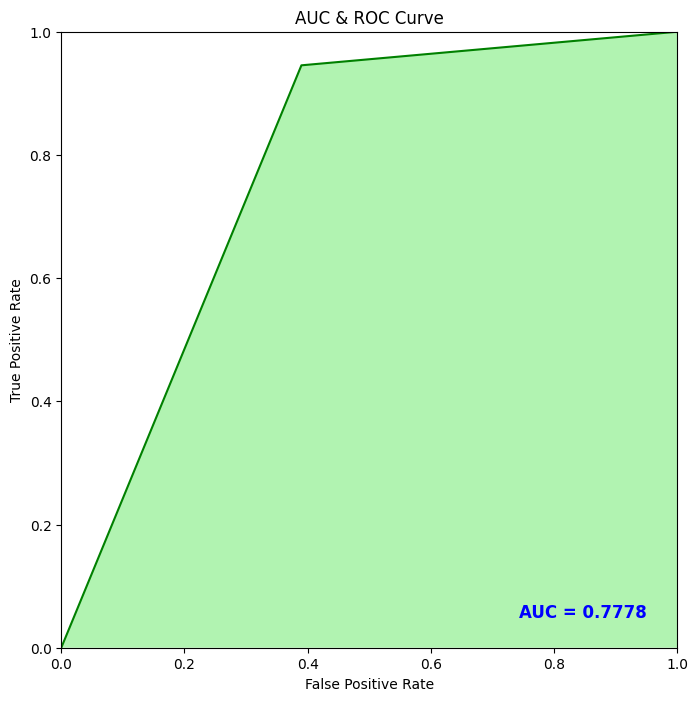

In [ ]:
auc = metrics.roc_auc_score(y_test, y_pred)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, y_pred)

plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [ ]:
'''
x_oos = df_oos.drop('target', axis=1)
y_oos = df_oos['target']

y_oos_pred = log_model.predict(x_oos)

print(classification_report(y_oos, y_oos_pred))
pd.DataFrame(confusion_matrix(y_oos, y_oos_pred, labels=[0,1]))
'''

"\nx_oos = df_oos.drop('target', axis=1)\ny_oos = df_oos['target']\n\ny_oos_pred = log_model.predict(x_oos)\n\nprint(classification_report(y_oos, y_oos_pred))\npd.DataFrame(confusion_matrix(y_oos, y_oos_pred, labels=[0,1]))\n"

In [ ]:
x_total = df21enc.drop('target', axis=1)
label_pred = log_model.predict(x_total)
label_pred_prob = log_model.predict_proba(x_total)[:,1]


In [ ]:
label_pred_prob

array([0.40932889, 0.691643  , 0.70043603, ..., 0.48218894, 0.48218894,
       0.48218894])

In [ ]:
label_pred

array([0, 1, 1, ..., 0, 0, 0])

In [ ]:
final = pd.DataFrame({'id':df21enc.index, 'label_pred': label_pred, 'label_pred_prob': label_pred_prob})
final

,id,label_pred,label_pred_prob
0,0,0,0.409329
1,1,1,0.691643
2,2,1,0.700436
3,3,1,0.540251
4,4,1,0.723652
...,...,...,...
4262,4262,0,0.482189
4263,4263,0,0.482189
4264,4264,0,0.482189
4265,4265,0,0.482189


In [ ]:
dff = pd.concat([df2, final], axis=1)

In [ ]:
dff.head(4)

,titulo,periodo,legisla,fechapresenta,proponente,sumilla,observaciones,autor,coautor,adherentes,grupoparla,comisiones,ultimoestado,estadoscrap,autorlink,fecha,enlace,contador_total,dias_proceso,semanas_proceso,semanas_proceso_cat,contador_total_cat,max,key_autor,key_congresista,nombre,votacion,inicio,fin,grupopartido,bancada,representa,condicion,target,brecha_fecha,contador2,dias_proceso2,id,label_pred,label_pred_prob
0,PROYECTO DE LEY N° 00003/2021-CR,2021-2026,Primera Legislatura Ordinaria 2021,05/08/2021,Congreso,PROPONE REFORMA CONSTITUCIONAL DEL ARTÍCULO 133 SOBRE LA CUESTIÓN DE CONFIANZA,LEY QUE DESARROLLA EL EJERCICIO DE LA CUESTIÓN DE CONFIANZA REGULADA EN EL ÚLTIMO PÁRRAFO DEL ARTÍCULO 132 Y EN EL ARTÍCULO 133 DE LA CONSTITUCIÓN POLÍTICA DEL PERÚ,LUNA GÁLVEZ JOSÉ LEÓN,"Wong Pujada, Enrique",- -,Podemos Perú,Constitución y Reglamento,Publicada en el Diario Oficial El Peruano (Seguimientos),yes,https://www.congreso.gob.pe/congresistas2021/JoseLuna/,02/05/2023 17:32:29,https://wb2server.congreso.gob.pe/spley-portal/#/expediente/2021/3,20,77,0.550000,1.0,4.0,2021-10-21,LUNA GÁLVEZ JOSÉ LEÓN,JOSÉ LEÓN LUNA GÁLVEZ,JOSÉ LEÓN LUNA GÁLVEZ,91055,26-jul-2021,27-jul-2026,Podemos Perú,PODEMOS PERÚ,Lima,en Ejercicio,1,593,400,5929,0,0,0.409329
1,PROYECTO DE LEY N° 00004/2021-CR,2021-2026,Primera Legislatura Ordinaria 2021,10/08/2021,Congreso,"PROPONE DECLARAR DE NECESIDAD PÚBLICA E INTERÉS NACIONAL LA RECUPERACIÓN, CONSERVACIÓN Y PROTECCIÓN DE LA PESCA ANCESTRAL EN CABALLITO DE TOTORA Y LA CREACIÓN DE LOS BALSARES EN EL DISTRITO DE PIMENTEL, PROVINCIA DE CHICLAYO, DEPARTAMENTO DE LAMBAYEQUE.","LEY QUE DECLARA DE INTERÉS NACIONAL AL RECUPERACIÓN, CONSERVACIÓN Y PROTECCIÓN DE LA PESCA ANCESTRAL EN CABALLITO DE TOTORA Y LA CREACIÓN DE BALSARES PARA EL CULTIVO DE TOTORA, EN EL DISTRITO DE PIMENTEL, PROVINCIA DE CHICLAYO, DEPARTAMENTO DE LAMBAYEQUE",CÓRDOVA LOBATÓN MARÍA JESSICA,"Cueto Aservi, José Ernesto",- -,Renovación Popular,"Producción, Micro y Pequeña Empresa y Cooperativas",Publicada en el Diario Oficial El Peruano (Seguimientos),yes,https://www.congreso.gob.pe/congresistas2021/MariaCordova/,02/05/2023 17:32:32,https://wb2server.congreso.gob.pe/spley-portal/#/expediente/2021/4,14,269,1.921429,2.0,3.0,2022-05-06,CÓRDOVA LOBATÓN MARÍA JESSICA,MARÍA JESSICA CÓRDOVA LOBATÓN,MARÍA JESSICA CÓRDOVA LOBATÓN,12552,26-jul-2021,27-jul-2026,Renovación Popular,AVANZA PAÍS - PARTIDO DE INTEGRACIÓN SOCIAL,Lambayeque,en Ejercicio,1,396,196,72361,1,1,0.691643
2,PROYECTO DE LEY N° 00005/2021-CR,2021-2026,Primera Legislatura Ordinaria 2021,10/08/2021,Congreso,"PROPONE MODIFICAR EL ARTÍCULO 8, NUMERAL 2) LITERAL I) DE LA LEY 29158 LEY ORGÁNICA DEL PODER EJECUTIVO.","LEY QUE MODIFICA LA LEY 29158, LEY ORGÁNICA DEL PODER EJECUTIVO, CON LA FINALIDAD DE ESTABLECER PROCEDIMIENTOS PARA EL NOMBRAMIENTO DE MINISTROS Y VICEMINISTROS, Y ATRIBUCIONES DEL CONSEJO DE MINISTROS",BAZÁN CALDERÓN DIEGO ALONSO FERNANDO,"Cueto Aservi, José Ernesto",- -,Renovación Popular,"Descentralización, Regionalización, Gobiernos Locales y Modernización de la Gestión del Estado",Publicada en el Diario Oficial El Peruano (Seguimientos),yes,https://www.congreso.gob.pe/congresistas2021/DiegoBazan/,02/05/2023 17:32:35,https://wb2server.congreso.gob.pe/spley-portal/#/expediente/2021/5,20,255,1.821429,2.0,4.0,2022-04-22,BAZÁN CALDERÓN DIEGO ALONSO FERNANDO,DIEGO ALONSO FERNANDO BAZÁN CALDERÓN,DIEGO ALONSO FERNANDO BAZÁN CALDERÓN,222,26-jul-2021,27-jul-2026,Renovación Popular,AVANZA PAÍS - PARTIDO DE INTEGRACIÓN SOCIAL,La Libertad,en Ejercicio,1,410,400,65025,2,1,0.700436
3,PROYECTO DE LEY N° 00006/2021-CR,2021-2026,Primera Legislatura Ordinaria 2021,10/08/2021,Congreso,PROPONE INTERPRETAR EL USO DE LA CUESTIÓN DE CONFIANZA REGULADA EN LOS ARTÍCULOS 132 Y 133 DE LA CONSTITUCIÓN POLÍTICA DEL PERÚ.,LEY QUE DESARROLLA EL EJERCICIO DE LA CUESTIÓN DE CONFIANZA REGULADA EN EL ÚLTIMO PÁRRAFO DEL ARTÍCULO 132 Y EN EL ARTÍCULO 133 DE LA CONSTITUCIÓN POLÍTICA DEL PERÚ,ARAGÓN CARREÑO LUIS ÁNGEL,"S

In [ ]:
dff['riesgo'] = np.where((dff['label_pred_prob']>0) & (dff['label_pred_prob']<=0.33), 'bajo', 
                         np.where((dff['label_pred_prob']>0.33) & (dff['label_pred_prob']<=0.66), 'medio', 'alto'))
dff[['riesgo', 'label_pred_prob', 'label_pred', 'target']]

,riesgo,label_pred_prob,label_pred,target
0,medio,0.409329,0,1
1,alto,0.691643,1,1
2,alto,0.700436,1,1
3,medio,0.540251,1,1
4,alto,0.723652,1,0
...,...,...,...,...
4262,medio,0.482189,0,0
4263,medio,0.482189,0,0
4264,medio,0.482189,0,0
4265,medio,0.482189,0,0


  ### 08 2 Modelo_1 ###

In [ ]:
x = df21enc.drop('target', axis=1)
y = df21enc['target']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=123)

In [ ]:
log_model  = LogisticRegression(max_iter = 1000, class_weight="balanced")
log_model.fit(x_train, y_train)
end_time = datetime.now()
# 06.02 performance

print ("Accuracy en train: {:.2%}".format(log_model.score(x_train, y_train)))
print ("Accuracy en test: {:.2%}".format(log_model.score(x_test, y_test)))
y_pred = log_model.predict(x_test)
print(classification_report(y_test, y_pred))

Accuracy en train: 95.38%
Accuracy en test: 94.54%
              precision    recall  f1-score   support

           0       0.99      0.94      0.97      1084
           1       0.76      0.95      0.84       197

    accuracy                           0.95      1281
   macro avg       0.87      0.95      0.90      1281
weighted avg       0.95      0.95      0.95      1281



In [ ]:
# 16% de los proyectos de ley que fueron predichos como aprobados, si fueron aprobados
# de los proyectos realmente aprobados 5% fueron predichos como aprobados 

## 09 Evaluación de modelo

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split


  ### 09 1 Modelos ###

In [ ]:
df21enc_columns = df21enc_base.columns.tolist()
#df21enc_base

In [ ]:
#Modelo 2: Polinómicas
df21enc_columns.remove('contador_total_cat')
df21enc_columns.remove('semanas_proceso_cat')
df21enc_columns.remove('target')
df21enc_columns2 = df21enc_columns

#Modelo 1: Ninguna
df21enc_columns = df21enc_base.columns.tolist()
df21enc_columns.remove('contador_total_cat')
df21enc_columns.remove('semanas_proceso_cat')
df21enc_columns.remove('target')
df21enc_columns.remove('contador2')
df21enc_columns.remove('dias_proceso2')
df21enc_columns1 = df21enc_columns  # Optionally, assign the modified list to df21enc_columns1

#Modelo 3: Variable categorica de semanas prcoeso
df21enc_columns = df21enc_base.columns.tolist()
df21enc_columns.remove('contador_total_cat')
df21enc_columns.remove('contador2')
df21enc_columns.remove('dias_proceso2')
df21enc_columns.remove('target')
df21enc_columns3 = df21enc_columns


#Modelo 5: Variable categorica de semanas prcoeso
df21enc_columns = df21enc_base.columns.tolist()
df21enc_columns.remove('contador2')
df21enc_columns.remove('dias_proceso2')
df21enc_columns.remove('target')
df21enc_columns5 = df21enc_columns


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE


In [ ]:

variable_sets1 = [
    {'variables': df21enc_columns1, 'oversampling': True, 'model': LogisticRegression(), 'name': "Modelo base (oversampling)"},
    {'variables': df21enc_columns1, 'oversampling': False, 'model': LogisticRegression(class_weight="balanced"), 'name': "Modelo 1 (sin oversampling)"},
    {'variables': df21enc_columns2, 'oversampling': False, 'model': LogisticRegression(class_weight="balanced"), 'name': "Modelo 2 (polinómicas)"},
    {'variables': df21enc_columns3, 'oversampling': False, 'model': LogisticRegression(class_weight="balanced"), 'name': "Modelo 3 (categóricas)"},
    {'variables': df21enc_columns5, 'oversampling': False, 'model': LogisticRegression(class_weight="balanced"), 'name': "Modelo 5 (new categóricas)"},
    {'variables': df21enc_columns3, 'oversampling': False, 'model': LogisticRegression(penalty='l1', solver='liblinear',class_weight="balanced"), 'name': "Modelo 6 (Lasso)"}
    # Add more variable sets as needed
]
# Nota: clas_weight = "balanced" es para balancear la muestra y que los resultados de la predicción no resulten sesgados

# Create an empty list to store the performance metrics
performance_metrics = []

# Loop through the variable sets
for var_set in variable_sets1:
    variables = var_set['variables']
    oversampling = var_set['oversampling']
    
    # Extract the subset of data based on the selected variables
    X_subset = df21enc_base[variables]  # Replace df with your DataFrame
    y = df21enc_base['target']  # Replace 'target' with your target variable
 # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_subset, y, test_size=0.3, random_state=123, stratify=y)
    
    # Apply oversampling if required
    if oversampling:
        oversampler = SMOTE()
        X_train, y_train = oversampler.fit_resample(X_train, y_train)
    
    # Loop through the models
    model = var_set['model']
    model_name = var_set['name']
    
    # Create and fit the model
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    #y_pred = model.predict(X_test)
    y_pred = (model.predict_proba(X_test)[:,1]>0.5).astype(int) # Predicción de probabilidad es 1 si es mayor a 0.5

    # Compute performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Calculate confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = conf_matrix.ravel()
    
    # Calculate false negative ratio and false positive ratio
    false_negative_ratio = fn / (fn + tp)
    false_positive_ratio = fp / (fp + tn)

    # Store the performance metrics in a dictionary
    metrics = {
        'Model': model_name,
        'Oversampling': oversampling,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'False Negative Ratio': false_negative_ratio,
        'False Positive Ratio': false_positive_ratio

    }
    
    # Append the metrics dictionary to the list
    performance_metrics.append(metrics)

# Create a DataFrame from the list of performance metrics
df_metrics = pd.DataFrame(performance_metrics)

# Display the performance metrics table
print(df_metrics)


                         Model  Oversampling  Accuracy  Precision    Recall  \
0   Modelo base (oversampling)          True  0.948478   0.769811  0.976077   
1  Modelo 1 (sin oversampling)         False  0.944575   0.755556  0.976077   
2       Modelo 2 (polinómicas)         False  0.949258   0.783465  0.952153   
3       Modelo 3 (categóricas)         False  0.954723   0.789272  0.985646   
4   Modelo 5 (new categóricas)         False  0.946916   0.760148  0.985646   
5             Modelo 6 (Lasso)         False  0.953162   0.789883  0.971292   

   F1-Score  False Negative Ratio  False Positive Ratio  
0  0.860759              0.023923              0.056903  
1  0.851775              0.023923              0.061567  
2  0.859611              0.047847              0.051306  
3  0.876596              0.014354              0.051306  
4  0.858333              0.014354              0.060634  
5  0.871245              0.028708              0.050373  


In [ ]:
df_metrics

,Model,Oversampling,Accuracy,Precision,Recall,F1-Score,False Negative Ratio,False Positive Ratio
0,Modelo base (oversampling),True,0.948478,0.769811,0.976077,0.860759,0.023923,0.056903
1,Modelo 1 (sin oversampling),False,0.944575,0.755556,0.976077,0.851775,0.023923,0.061567
2,Modelo 2 (polinómicas),False,0.949258,0.783465,0.952153,0.859611,0.047847,0.051306
3,Modelo 3 (categóricas),False,0.954723,0.789272,0.985646,0.876596,0.014354,0.051306
4,Modelo 5 (new categóricas),False,0.946916,0.760148,0.985646,0.858333,0.014354,0.060634
5,Modelo 6 (Lasso),False,0.953162,0.789883,0.971292,0.871245,0.028708,0.050373


In [ ]:
# Modelo 3

In [ ]:
X_subset_mod5 = df21enc_base[df21enc_columns5]

X_train, X_test, y_train, y_test = train_test_split(X_subset_mod5, y, test_size=0.3, random_state=123, stratify=y)

#log_model=LogisticRegression(class_weight="balanced")

LogisticRegression(penalty='l1', solver='liblinear',class_weight="balanced")

log_model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [ ]:
#label_pred = log_model.predict(X_subset_mod5)
label_pred = (log_model.predict_proba(X_subset_mod5)[:,1]>0.5).astype(int)
label_pred_prob = log_model.predict_proba(X_subset_mod5)[:,1]

In [ ]:
label_pred

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
label_pred_prob

array([0.99995984, 0.99780532, 0.9999828 , ..., 0.0120934 , 0.0120934 ,
       0.0120934 ])

In [ ]:
final1 = pd.DataFrame({'id':X_subset_mod5.index, 'label_pred': label_pred, 'label_pred_prob': label_pred_prob})
final1

,id,label_pred,label_pred_prob
0,0,1,0.999960
1,1,1,0.997805
2,2,1,0.999983
3,3,1,0.999985
4,4,0,0.017520
...,...,...,...
4262,4262,0,0.012093
4263,4263,0,0.012093
4264,4264,0,0.012093
4265,4265,0,0.012093


In [ ]:
dff1 = pd.concat([df2, final1], axis=1)

In [ ]:
dff1.head(4)

,titulo,periodo,legisla,fechapresenta,proponente,sumilla,observaciones,autor,coautor,adherentes,grupoparla,comisiones,ultimoestado,estadoscrap,autorlink,fecha,enlace,contador_total,dias_proceso,semanas_proceso,semanas_proceso_cat,contador_total_cat,max,key_autor,key_congresista,nombre,votacion,inicio,fin,grupopartido,bancada,representa,condicion,target,brecha_fecha,contador2,dias_proceso2,id,label_pred,label_pred_prob
0,PROYECTO DE LEY N° 00003/2021-CR,2021-2026,Primera Legislatura Ordinaria 2021,05/08/2021,Congreso,PROPONE REFORMA CONSTITUCIONAL DEL ARTÍCULO 133 SOBRE LA CUESTIÓN DE CONFIANZA,LEY QUE DESARROLLA EL EJERCICIO DE LA CUESTIÓN DE CONFIANZA REGULADA EN EL ÚLTIMO PÁRRAFO DEL ARTÍCULO 132 Y EN EL ARTÍCULO 133 DE LA CONSTITUCIÓN POLÍTICA DEL PERÚ,LUNA GÁLVEZ JOSÉ LEÓN,"Wong Pujada, Enrique",- -,Podemos Perú,Constitución y Reglamento,Publicada en el Diario Oficial El Peruano (Seguimientos),yes,https://www.congreso.gob.pe/congresistas2021/JoseLuna/,02/05/2023 17:32:29,https://wb2server.congreso.gob.pe/spley-portal/#/expediente/2021/3,20,77,0.550000,1.0,4.0,2021-10-21,LUNA GÁLVEZ JOSÉ LEÓN,JOSÉ LEÓN LUNA GÁLVEZ,JOSÉ LEÓN LUNA GÁLVEZ,91055,26-jul-2021,27-jul-2026,Podemos Perú,PODEMOS PERÚ,Lima,en Ejercicio,1,593,400,5929,0,1,0.999960
1,PROYECTO DE LEY N° 00004/2021-CR,2021-2026,Primera Legislatura Ordinaria 2021,10/08/2021,Congreso,"PROPONE DECLARAR DE NECESIDAD PÚBLICA E INTERÉS NACIONAL LA RECUPERACIÓN, CONSERVACIÓN Y PROTECCIÓN DE LA PESCA ANCESTRAL EN CABALLITO DE TOTORA Y LA CREACIÓN DE LOS BALSARES EN EL DISTRITO DE PIMENTEL, PROVINCIA DE CHICLAYO, DEPARTAMENTO DE LAMBAYEQUE.","LEY QUE DECLARA DE INTERÉS NACIONAL AL RECUPERACIÓN, CONSERVACIÓN Y PROTECCIÓN DE LA PESCA ANCESTRAL EN CABALLITO DE TOTORA Y LA CREACIÓN DE BALSARES PARA EL CULTIVO DE TOTORA, EN EL DISTRITO DE PIMENTEL, PROVINCIA DE CHICLAYO, DEPARTAMENTO DE LAMBAYEQUE",CÓRDOVA LOBATÓN MARÍA JESSICA,"Cueto Aservi, José Ernesto",- -,Renovación Popular,"Producción, Micro y Pequeña Empresa y Cooperativas",Publicada en el Diario Oficial El Peruano (Seguimientos),yes,https://www.congreso.gob.pe/congresistas2021/MariaCordova/,02/05/2023 17:32:32,https://wb2server.congreso.gob.pe/spley-portal/#/expediente/2021/4,14,269,1.921429,2.0,3.0,2022-05-06,CÓRDOVA LOBATÓN MARÍA JESSICA,MARÍA JESSICA CÓRDOVA LOBATÓN,MARÍA JESSICA CÓRDOVA LOBATÓN,12552,26-jul-2021,27-jul-2026,Renovación Popular,AVANZA PAÍS - PARTIDO DE INTEGRACIÓN SOCIAL,Lambayeque,en Ejercicio,1,396,196,72361,1,1,0.997805
2,PROYECTO DE LEY N° 00005/2021-CR,2021-2026,Primera Legislatura Ordinaria 2021,10/08/2021,Congreso,"PROPONE MODIFICAR EL ARTÍCULO 8, NUMERAL 2) LITERAL I) DE LA LEY 29158 LEY ORGÁNICA DEL PODER EJECUTIVO.","LEY QUE MODIFICA LA LEY 29158, LEY ORGÁNICA DEL PODER EJECUTIVO, CON LA FINALIDAD DE ESTABLECER PROCEDIMIENTOS PARA EL NOMBRAMIENTO DE MINISTROS Y VICEMINISTROS, Y ATRIBUCIONES DEL CONSEJO DE MINISTROS",BAZÁN CALDERÓN DIEGO ALONSO FERNANDO,"Cueto Aservi, José Ernesto",- -,Renovación Popular,"Descentralización, Regionalización, Gobiernos Locales y Modernización de la Gestión del Estado",Publicada en el Diario Oficial El Peruano (Seguimientos),yes,https://www.congreso.gob.pe/congresistas2021/DiegoBazan/,02/05/2023 17:32:35,https://wb2server.congreso.gob.pe/spley-portal/#/expediente/2021/5,20,255,1.821429,2.0,4.0,2022-04-22,BAZÁN CALDERÓN DIEGO ALONSO FERNANDO,DIEGO ALONSO FERNANDO BAZÁN CALDERÓN,DIEGO ALONSO FERNANDO BAZÁN CALDERÓN,222,26-jul-2021,27-jul-2026,Renovación Popular,AVANZA PAÍS - PARTIDO DE INTEGRACIÓN SOCIAL,La Libertad,en Ejercicio,1,410,400,65025,2,1,0.999983
3,PROYECTO DE LEY N° 00006/2021-CR,2021-2026,Primera Legislatura Ordinaria 2021,10/08/2021,Congreso,PROPONE INTERPRETAR EL USO DE LA CUESTIÓN DE CONFIANZA REGULADA EN LOS ARTÍCULOS 132 Y 133 DE LA CONSTITUCIÓN POLÍTICA DEL PERÚ.,LEY QUE DESARROLLA EL EJERCICIO DE LA CUESTIÓN DE CONFIANZA REGULADA EN EL ÚLTIMO PÁRRAFO DEL ARTÍCULO 132 Y EN EL ARTÍCULO 133 DE LA CONSTITUCIÓN POLÍTICA DEL PERÚ,ARAGÓN CARREÑO LUIS ÁNGEL,"S

In [ ]:
dff

,titulo,periodo,legisla,fechapresenta,proponente,sumilla,observaciones,autor,coautor,adherentes,grupoparla,comisiones,ultimoestado,estadoscrap,autorlink,fecha,enlace,contador_total,dias_proceso,semanas_proceso,semanas_proceso_cat,contador_total_cat,max,key_autor,key_congresista,nombre,votacion,inicio,fin,grupopartido,bancada,representa,condicion,target,brecha_fecha,contador2,dias_proceso2,id,label_pred,label_pred_prob,riesgo
0,PROYECTO DE LEY N° 00003/2021-CR,2021-2026,Primera Legislatura Ordinaria 2021,05/08/2021,Congreso,PROPONE REFORMA CONSTITUCIONAL DEL ARTÍCULO 133 SOBRE LA CUESTIÓN DE CONFIANZA,LEY QUE DESARROLLA EL EJERCICIO DE LA CUESTIÓN DE CONFIANZA REGULADA EN EL ÚLTIMO PÁRRAFO DEL ARTÍCULO 132 Y EN EL ARTÍCULO 133 DE LA CONSTITUCIÓN POLÍTICA DEL PERÚ,LUNA GÁLVEZ JOSÉ LEÓN,"Wong Pujada, Enrique",- -,Podemos Perú,Constitución y Reglamento,Publicada en el Diario Oficial El Peruano (Seguimientos),yes,https://www.congreso.gob.pe/congresistas2021/JoseLuna/,02/05/2023 17:32:29,https://wb2server.congreso.gob.pe/spley-portal/#/expediente/2021/3,20,77,0.550000,1.0,4.0,2021-10-21,LUNA GÁLVEZ JOSÉ LEÓN,JOSÉ LEÓN LUNA GÁLVEZ,JOSÉ LEÓN LUNA GÁLVEZ,91055,26-jul-2021,27-jul-2026,Podemos Perú,PODEMOS PERÚ,Lima,en Ejercicio,1,593,400,5929,0,0,0.409329,medio
1,PROYECTO DE LEY N° 00004/2021-CR,2021-2026,Primera Legislatura Ordinaria 2021,10/08/2021,Congreso,"PROPONE DECLARAR DE NECESIDAD PÚBLICA E INTERÉS NACIONAL LA RECUPERACIÓN, CONSERVACIÓN Y PROTECCIÓN DE LA PESCA ANCESTRAL EN CABALLITO DE TOTORA Y LA CREACIÓN DE LOS BALSARES EN EL DISTRITO DE PIMENTEL, PROVINCIA DE CHICLAYO, DEPARTAMENTO DE LAMBAYEQUE.","LEY QUE DECLARA DE INTERÉS NACIONAL AL RECUPERACIÓN, CONSERVACIÓN Y PROTECCIÓN DE LA PESCA ANCESTRAL EN CABALLITO DE TOTORA Y LA CREACIÓN DE BALSARES PARA EL CULTIVO DE TOTORA, EN EL DISTRITO DE PIMENTEL, PROVINCIA DE CHICLAYO, DEPARTAMENTO DE LAMBAYEQUE",CÓRDOVA LOBATÓN MARÍA JESSICA,"Cueto Aservi, José Ernesto",- -,Renovación Popular,"Producción, Micro y Pequeña Empresa y Cooperativas",Publicada en el Diario Oficial El Peruano (Seguimientos),yes,https://www.congreso.gob.pe/congresistas2021/MariaCordova/,02/05/2023 17:32:32,https://wb2server.congreso.gob.pe/spley-portal/#/expediente/2021/4,14,269,1.921429,2.0,3.0,2022-05-06,CÓRDOVA LOBATÓN MARÍA JESSICA,MARÍA JESSICA CÓRDOVA LOBATÓN,MARÍA JESSICA CÓRDOVA LOBATÓN,12552,26-jul-2021,27-jul-2026,Renovación Popular,AVANZA PAÍS - PARTIDO DE INTEGRACIÓN SOCIAL,Lambayeque,en Ejercicio,1,396,196,72361,1,1,0.691643,alto
2,PROYECTO DE LEY N° 00005/2021-CR,2021-2026,Primera Legislatura Ordinaria 2021,10/08/2021,Congreso,"PROPONE MODIFICAR EL ARTÍCULO 8, NUMERAL 2) LITERAL I) DE LA LEY 29158 LEY ORGÁNICA DEL PODER EJECUTIVO.","LEY QUE MODIFICA LA LEY 29158, LEY ORGÁNICA DEL PODER EJECUTIVO, CON LA FINALIDAD DE ESTABLECER PROCEDIMIENTOS PARA EL NOMBRAMIENTO DE MINISTROS Y VICEMINISTROS, Y ATRIBUCIONES DEL CONSEJO DE MINISTROS",BAZÁN CALDERÓN DIEGO ALONSO FERNANDO,"Cueto Aservi, José Ernesto",- -,Renovación Popular,"Descentralización, Regionalización, Gobiernos Locales y Modernización de la Gestión del Estado",Publicada en el Diario Oficial El Peruano (Seguimientos),yes,https://www.congreso.gob.pe/congresistas2021/DiegoBazan/,02/05/2023 17:32:35,https://wb2server.congreso.gob.pe/spley-portal/#/expediente/2021/5,20,255,1.821429,2.0,4.0,2022-04-22,BAZÁN CALDERÓN DIEGO ALONSO FERNANDO,DIEGO ALONSO FERNANDO BAZÁN CALDERÓN,DIEGO ALONSO FERNANDO BAZÁN CALDERÓN,222,26-jul-2021,27-jul-2026,Renovación Popular,AVANZA PAÍS - PARTIDO DE INTEGRACIÓN SOCIAL,La Libertad,en Ejercicio,1,410,400,65025,2,1,0.700436,alto
3,PROYECTO DE LEY N° 00006/2021-CR,2021-2026,Primera Legislatura Ordinaria 2021,10/08/2021,Congreso,PROPONE INTERPRETAR EL USO DE LA CUESTIÓN DE CONFIANZA REGULADA EN LOS ARTÍCULOS 132 Y 133 DE LA CONSTITUCIÓN POLÍTICA DEL PERÚ.,LEY QUE DESARROLLA EL EJERCICIO DE LA CUESTIÓN DE CONFIANZA REGULADA EN EL ÚLTIMO PÁRRAFO DEL ARTÍCULO 132 Y EN EL ARTÍCULO 133 DE LA CONSTITUCIÓN POLÍTICA DEL PERÚ,ARAGÓ

## 09 Integración matrix seguimiento

In [ ]:
import re

dff['key_proy'] = [ re.findall(r'[\d]+[./\d]+', x)[0] for x in dff['titulo']]
dff['key_proy']

0       00003/2021
1       00004/2021
2       00005/2021
3       00006/2021
4       00007/2021
           ...    
4262    04548/2022
4263    04548/2022
4264    04548/2022
4265    04548/2022
4266    04548/2022
Name: key_proy, Length: 4267, dtype: object

In [ ]:
matrix_pf.columns

Index(['matrix FECHA', 'matrix NUMERO', 'matrix PROYECTO / DESCRIPCIÓN',
       'matrix PROPONENTE', 'matrix BANCADA', 'matrix ALERTA',
       'matrix COMISIÓN', 'matrix ESTADO', 'matrix COMENTARIOS',
       'matrix BANCADAS A FAVOR ', 'matrix BANCADAS EN CONTRA ',
       'matrix BANCADAS EN ABSTENCIÓN', 'matrix IMPACTO',
       'matrix JUSTIFICACIÓN DEL IMPACTO', 'matrix AMBIENTE FAVORABLE',
       'matrix GRADO  POPULISTA', 'matrix PROBABILIDAD',
       'matrix OPINION GREMIAL', 'matrix key_proy'],
      dtype='object')

In [ ]:
set(matrix_pf.columns).intersection(dff.columns)

set()

In [ ]:
dff2=pd.merge(dff, matrix_pf, left_on="key_proy", right_on="matrix key_proy", how="left", indicator=True)
dff2.head(2)

,titulo,periodo,legisla,fechapresenta,proponente,sumilla,observaciones,autor,coautor,adherentes,grupoparla,comisiones,ultimoestado,estadoscrap,autorlink,fecha,enlace,contador_total,dias_proceso,semanas_proceso,semanas_proceso_cat,contador_total_cat,max,key_autor,key_congresista,nombre,votacion,inicio,fin,grupopartido,bancada,representa,condicion,target,brecha_fecha,contador2,dias_proceso2,id,label_pred,label_pred_prob,riesgo,key_proy,matrix FECHA,matrix NUMERO,matrix PROYECTO / DESCRIPCIÓN,matrix PROPONENTE,matrix BANCADA,matrix ALERTA,matrix COMISIÓN,matrix ESTADO,matrix COMENTARIOS,matrix BANCADAS A FAVOR,matrix BANCADAS EN CONTRA,matrix BANCADAS EN ABSTENCIÓN,matrix IMPACTO,matrix JUSTIFICACIÓN DEL IMPACTO,matrix AMBIENTE FAVORABLE,matrix GRADO POPULISTA,matrix PROBABILIDAD,matrix OPINION GREMIAL,matrix key_proy,_merge
0,PROYECTO DE LEY N° 00003/2021-CR,2021-2026,Primera Legislatura Ordinaria 2021,05/08/2021,Congreso,PROPONE REFORMA CONSTITUCIONAL DEL ARTÍCULO 133 SOBRE LA CUESTIÓN DE CONFIANZA,LEY QUE DESARROLLA EL EJERCICIO DE LA CUESTIÓN DE CONFIANZA REGULADA EN EL ÚLTIMO PÁRRAFO DEL ARTÍCULO 132 Y EN EL ARTÍCULO 133 DE LA CONSTITUCIÓN POLÍTICA DEL PERÚ,LUNA GÁLVEZ JOSÉ LEÓN,"Wong Pujada, Enrique",- -,Podemos Perú,Constitución y Reglamento,Publicada en el Diario Oficial El Peruano (Seguimientos),yes,https://www.congreso.gob.pe/congresistas2021/JoseLuna/,02/05/2023 17:32:29,https://wb2server.congreso.gob.pe/spley-portal/#/expediente/2021/3,20,77,0.550000,1.0,4.0,2021-10-21,LUNA GÁLVEZ JOSÉ LEÓN,JOSÉ LEÓN LUNA GÁLVEZ,JOSÉ LEÓN LUNA GÁLVEZ,91055,26-jul-2021,27-jul-2026,Podemos Perú,PODEMOS PERÚ,Lima,en Ejercicio,1,593,400,5929,0,0,0.409329,medio,00003/2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
1,PROYECTO DE LEY N° 00004/2021-CR,2021-2026,Primera Legislatura Ordinaria 2021,10/08/2021,Congreso,"PROPONE DECLARAR DE NECESIDAD PÚBLICA E INTERÉS NACIONAL LA RECUPERACIÓN, CONSERVACIÓN Y PROTECCIÓN DE LA PESCA ANCESTRAL EN CABALLITO DE TOTORA Y LA CREACIÓN DE LOS BALSARES EN EL DISTRITO DE PIMENTEL, PROVINCIA DE CHICLAYO, DEPARTAMENTO DE LAMBAYEQUE.","LEY QUE DECLARA DE INTERÉS NACIONAL AL RECUPERACIÓN, CONSERVACIÓN Y PROTECCIÓN DE LA PESCA ANCESTRAL EN CABALLITO DE TOTORA Y LA CREACIÓN DE BALSARES PARA EL CULTIVO DE TOTORA, EN EL DISTRITO DE PIMENTEL, PROVINCIA DE CHICLAYO, DEPARTAMENTO DE LAMBAYEQUE",CÓRDOVA LOBATÓN MARÍA JESSICA,"Cueto Aservi, José Ernesto",- -,Renovación Popular,"Producción, Micro y Pequeña Empresa y Cooperativas",Publicada en el Diario Oficial El Peruano (Seguimientos),yes,https://www.congreso.gob.pe/congresistas2021/MariaCordova/,02/05/2023 17:32:32,https://wb2server.congreso.gob.pe/spley-portal/#/expediente/2021/4,14,269,1.921429,2.0,3.0,2022-05-06,CÓRDOVA LOBATÓN MARÍA JESSICA,MARÍA JESSICA CÓRDOVA LOBATÓN,MARÍA JESSICA CÓRDOVA LOBATÓN,12552,26-jul-2021,27-jul-2026,Renovación Popular,AVANZA PAÍS - PARTIDO DE INTEGRACIÓN SOCIAL,Lambayeque,en Ejercicio,1,396,196,72361,1,1,0.691643,alto,00004/2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


In [ ]:
dff2._merge.value_counts()

left_only     4209
both            58
right_only       0
Name: _merge, dtype: int64

In [ ]:
dff2 = dff2.replace(np.nan, '')

In [ ]:
dff2['label_pred_prob'].describe()

count    4267.000000
mean        0.552704
std         0.109562
min         0.278546
25%         0.482189
50%         0.497135
75%         0.626578
max         0.905213
Name: label_pred_prob, dtype: float64

## 11 Export

In [ ]:
# exportación para ver resultados
lin = 'https://docs.google.com/spreadsheets/d/16vsPetGMBsRQfz-jIYL7JL32euMCYA6O8-qA48L4W8U/edit#gid=0'

In [ ]:
'''
sh2 = gc.open_by_url(lin)
wks1 = sh2[0]
wks1.clear(start='A1', end=None)
wks1.set_dataframe(dff2, 'A1')
'''

"\nsh2 = gc.open_by_url(lin)\nwks1 = sh2[0]\nwks1.clear(start='A1', end=None)\nwks1.set_dataframe(dff2, 'A1')\n"

In [ ]:
sh2 = gc.open_by_url(lin)
wks1 = sh2[2]
wks1.clear(start='A1', end=None)
wks1.set_dataframe(dff1, 'A1')